# Project: Tools to Help Real Estae Agents in Ames, Iowa
## 95-791 Data Mining (Fall 2021) 
### Name: Abdullah Ahmad(aahmad1), Shantanu Samant(sssamant), Jesus Hererra(jeherrer)





### Installing and loading packages



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score 
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
import time


# INTRODUCTION

# Project

**Project Description**

The year is 2011. Our team is hired by a real estae agency in Pittsburgh who are looking to set up operations in Ames, Iowa. We have been hired to help the real estate agency understadnt the housing market in Ames better. They wish to know what is that the residents of Ames looking for in houses. Based on this information they will know what attributes of the houses to pay special attention to.

In the housing market, each property has a series of physical characteristics that determine its value. These physical characteristics (number of rooms, type of material, utilities, etc.) can positively or negatively affect its price. The supply side offers houses with very different attributes, while the demand side assigns different relative values to each housing attribute. 


The price of homes is a complex interaction of attributes. Consequently,  the real estate market faces the challenge of understanding how real estate prices depend on the valuation of house's attributes.
Decision-makers in the private sector (real estate) or public sector need to know the degree of influence of an attribute on the market price of a house. Thus, decision-makers can predict how the price will change as the characteristics of each attribute change. 

In this project, we will conduct a regression model using a public dataset of houses’ physical characteristics to evaluate how these variables are associated with the market price of a private residential house. 


**Project Questions**

Q1) What is the unique set of houses' physical attributes that are most associated to the final Sale Price of real estate? To which degree does each variable influence the final price? This will be very useful information for real estate agents. This allows them to identify which charecteristics to focus on when evaluating if they should buy the house for investment purposes.This is a feature selection problem.

Q2) How can we create a model that is best able to predict the Sale price of the house if house charecteristics are provided. This will be very helpful for real estate agents to make business decisions about houses in their protfolios. This will tell them what would be the expected sale price of the house. This is a regression problem. 

Q3) The houses in the dataset have an overall ranking based on their features. We are trying to indeitify what are the physical properties of a house that best evaluate and classify its overall condition? This will allow real estat agents to classify a house into a unique measurable category and be able to compare all houses over a common classification. If they recieve all charecteristics of a house they can use this method to classifiy the house on a scale of 1 - 10. This will be a classification problem. 

Q4) In Ames, there are three main zip code areas. Are there any striking differences in the houses' attributes that allow classifying which zip code a property belongs to?. This will help real estate agents to decide if they should focus on sale of houses in a perticluar zip code. This is a classification problem  


**Datasets**




We got to work right away and looked for necessary datasets to base our analysis on.

Since the scope of our project is limited to Ames, Iowa,  we will use credible data sources for housing prices in this city. In our case, these databases will be provided by Kaggle.com and UnitedStatesZipCodes.com.
1) House Prices - Advanced Regression Techniques:

● Description: Information on variables that describe the characteristics and prices of houses located in Ames, Iowa. It contains information from 2006 to 2010. 

● Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code
This dataset contains 1460 observations and 82 variables. All variables describe the physical characteristics of private residential houses. We define physical characteristics as the design, construction and location properties of the houses. Variables can be continuous if they indicate sizes and measurements, and categorical if they indicate the type or quality of material and building. 

2) Statistics for zip code areas in Ames, Iowa:

● Description: Average household income and estimated population in each of Ames’ zip code areas.

● Source: https://www.unitedstateszipcodes.org/50010/

Note that Ames is a small city. It has a surface of 27.68 sq mi (71.71 km2) and a population of 66,000 inhabitants. The city comprises five different zip codes. However, the largest zip code areas are the ones from 50010, 50014, and 50105. 
We constructed this dataset by collecting information on the number of inhabitants and average household income in the three largest zip code areas of Ames. 
The dataset contains observations for the years 2006 to 2010. 
We also consulted the results of the US Census American Community Survey. However, the site does not have information available for the years 2006 - 2010 at the zip code level in Ames, Iowa. The US Census Bureau provides information only at the zip code level from the 2019 American Community Survey 5-Year Estimates. See link.

**BEFORE WE BEGIN ANALYZING OUR DATA WE HAVE TO CLEAN OUR DATA FIRST**

# Section 1 

### Dataset 1

**Importing Dataset 1**

In [2]:
df = pd.read_csv("train.csv")#call the data
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


**Preporcessing Dataset 1**

In [3]:
df.columns = df.columns.str.replace(' ', '')# Removing spaces for column names
#df.columns

In [4]:
#Identifying missing values
print(df.isnull().sum())#summing up number of missing variables in a column
df[df.isnull().any(axis=1)]

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


We see that the output result does not show the number of missing variables in each column. Hence we will then first idenftify columns which have missing values, create a dataset of of those columns and use the above function again to see the full list of columns with missing variables before we decide what to do with them. 

In [5]:
df.columns[df.isnull().any()]#Identifying Names of Columns with Null Values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [6]:
#Creating new dataset with columns with missing values so we can see all values and not in a collapsed list
testing = df[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]

In [7]:
#Identifying the Number of Missing Values in each Column with a Missing Value
print(testing.isnull().sum())#summing up number of missing variables in a column


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Our dataset has 1460 observations. From our results we can see that their are variables that have substantial number of observations missing like MiscFeature (missing 96.3% of observations), Fence (missing 80% of observations), PoolQC (missing 99.5% of observations), Fireplace (missing 47% of observations), Alley (missing 93.7% of observations).

Since a good practice is to not include a column with more than 25-30 percent of the data missing, we will hence drop MiscFeature, Fence, PoolQC, Fireplace, Alley from our datast.


**Removing columns with extensive null values**

In [8]:
#Removing MiscFeature, Fence, PoolQC, Fireplace, Alley from our Dataset
df_1 = df.drop(['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'], axis=1)#Dropoing columns 
df_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


**Removing Null Values**

Many of the rows that have missing values can be treated in a way where we would not have to remove the null records, instead we could replace them with mean values for the column. However this can have a bias on our dataset if the real values of those data points were substantialy different from the mean or median values we are substituting them with .

We can try to see that what is the total number of observations left if we are to get rid of records with missing values. If the total number of observations do not change dramaticaly we can just get rid of those records so that we can work on an accurate dataset

In [9]:
df_clean = df_1.dropna()#Dropping null values
df_clean

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


We see that after getting rid of the remaining records with null values, we are left with 1094 observations from the initial 1460. A dataset of accurante 1094 records is substantialy large to perform prediction analysis so we get rid of rows with missing values.

The steps covered so far are: Step 1: Identify columns and respective missing values. Step 2: Remove columns MiscFeature, Fence, PoolQC, Fireplace, Alley as they mostly contain null values Step 3: Remove remaining rows with missing values

## Dataset 2

In our dataset we have identified that therer is no reference to the socioeconomic standerd of the neighborhood in which the houses are being sold. We belive that the prices will varry depending on the household income of the area. Areas with higher household income will have higher house prices while those with lower household income will have lower sale prices. In order to include the socioecomic dimension to our regression we have found sources which provides data on household income by year and neighborhood in Ames, Iowa.


Description: Average household income and estimated population in each of Ames’ zip code areas. 

Source: https://www.unitedstateszipcodes.org/50010/
https://www.unitedstateszipcodes.org/50014/ and https://www.unitedstateszipcodes.org/50105/. We have manually collected  the information on avergae household income for the three zip codes from 2206 - 2010 and added it to an excel sheet to be used for our analysis. 

Note that Ames is a small city. It has a surface of 27.68 sq mi (71.71 km2) and a population of 66,000 inhabitants. The city comprises five different zip codes. However, the largest zip code areas are the ones from 50010, 50014, and 50105. 
We constructed this dataset by collecting information on the number of inhabitants and average household income in the three largest zip code areas of Ames. 

In [10]:
#Importing dataset 2
df_h_income = pd.read_csv("HouseholdIncome_Ames_2006-2010.csv")#call the data
df_h_income

,ZIP,YEAR,AVERAGE_HOUSEHOLD_INCOME,ESTIMATEDPOPULATION
0,50010,2006,54914,22287
1,50010,2007,54990,23810
2,50010,2008,54108,23487
3,50010,2009,54306,23402
4,50010,2010,56822,23558
5,50014,2006,55048,15799
6,50014,2007,60638,16592
7,50014,2008,61452,16250
8,50014,2009,56597,16382
9,50014,2010,58746,16537


## Merging Two Datasets

**Adding Zip Column in First Dataset**

In first dataset neighborhoods are identified by name, in the second dataset neighborhoods are classified by zip number. To be able to merge both we will:

Firstly, add zip column in our first dataset. Secondly Join the two datasets on the zip and year

**Add New Column to Dataset 1**

In [11]:
df_clean["Zip"] = df_clean.loc[:, "Neighborhood"]# Creating new column zip which has the same values as column Neighborhood
df_clean



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Zip
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,CollgCr
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,Veenker
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,CollgCr
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,Crawfor
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,NoRidge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,8,2007,WD,Normal,175000,Gilbert
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2010,WD,Normal,210000,NWAmes
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2500,5,2010,WD,Normal,266500,Crawfor
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,4,2010,WD,Normal,142125,NAmes


In [12]:
#creating a dictionary that will be used to change name of neighbourhood to a zip
neighborhood_to_zip = {"Blmngtn" : 50010, "Blueste" : 50014, "BrDale" : 50010, "BrkSide" : 50010, "ClearCr" : 50014 ,"CollgCr" : 50014, "Crawfor" : 50010, "Edwards" : 50014, "Gilbert" : 50105, "IDOTRR" : 50010, "MeadowV" : 50010, "Mitchel" : 50010, "NAmes" : 50010, "NoRidge" : 50010, "NPkVill" : 50010, "NridgHt" : 50010, "NWAmes" : 50010, "OldTown" : 50010, "Sawyer" : 50014, "SawyerW" : 50014, "Somerst" : 50010,"StoneBr" : 50010, "SWISU" : 50011, "Timber" : 50014,"Veenker" : 50011}#Here we create a dictionary with a combination of neighborhood name and zip code. We will use this to replace values in Zip column 

In [13]:
#We replace neighborhood names to zip codes
df_clean['Zip'] = df_clean.loc[:, "Zip"].replace(neighborhood_to_zip)#replacing neighbourhood names in zip coulmn with zip number


**Merging both Dataframes with Join**

In [14]:
new_df = pd.merge(df_clean, df_h_income,  how='left', left_on=['YrSold','Zip'], right_on = ['YEAR','ZIP'])#Merging both datasets using YrSold and ZIP from first dataset and YEAR and ZIP from the second dataset
new_df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Zip,ZIP,YEAR,AVERAGE_HOUSEHOLD_INCOME,ESTIMATEDPOPULATION
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,2,2008,WD,Normal,208500,50014,50014.0,2008.0,61452.0,16250.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,5,2007,WD,Normal,181500,50011,NaN,NaN,NaN,NaN
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,9,2008,WD,Normal,223500,50014,50014.0,2008.0,61452.0,16250.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,2,2006,WD,Abnorml,140000,50010,50010.0,2006.0,54914.0,22287.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,12,2008,WD,Normal,250000,50010,50010.0,2008.0,54108.0,23487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,8,2007,WD,Normal,175000,50105,50105.0,2007.0,54742.0,1206.0
1090,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,2,2010,WD,Normal,210000,50010,50010.0,2010.0,56822.0,23558.0
1091,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,5,2010,WD,Normal,266500,50010,50010.0,2010.0,56822.0,23558.0
1092,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,4,2010,WD,Normal,142125,50010,50010.0,2010.0,56822.0,23558.0


We see that we have sucessfuly combined the two datasets on the selling year and zip code. It must be noted that we were able to get Average Household Income for zip codes for 50010, 50014 and 50105 for years 2006-2010. We were unable to get the average household data for the zipcode 50011. The number of house sales for 50011 were only 38 sales. Since we are unable to find the household income for 50011 for years 2006-2010, we will get rid of the observations in this zip and focus our attention on the remaining data for which we have household income and population information. 

**Getting Rid of observations for Zip 50011**

In [15]:
indexNames = new_df[ new_df['Zip'] == 50011 ].index#identifying index of rows which are in zip 5011
indexNames

Int64Index([   1,   41,  197,  247,  267,  283,  299,  303,  347,  426,  436,
             516,  578,  605,  625,  646,  671,  774,  819,  825,  849,  865,
             961, 1016, 1028, 1047],
           dtype='int64')

In [16]:
new_df.drop(indexNames , inplace=True)#removing rows which have zip 5011
#new_df

**Removing Duplicated ZIP and YEAR columns**

In our df_final datset we have added columns of ZIP and YEAR duplicated. These were columns used to join the two dataset. Hence we will get rid of the two.

In [17]:
df_final = new_df.drop(['ZIP', 'YEAR'], axis=1)#droping ZIP and YEAR column
#df_final

**Checking if there is a single NUll value in our results**

In [18]:
df_final.isnull().values.any()

False

The result shows that therer is not a single null vale. We have sucessfuly taken care of all null values

# Methodology

### Q1What is the unique set of houses' physical attributes variables associated with the final price of real estate? 

**To which degree does each variable influence the final price? This will be very useful information for real estate agents. This allows them to identify which charecteristics to focus on when evaluating if they should buy the house for investment purposes.This is a feature selection problem.**

The issue we first run is that there are 80 dependent variables and one target variable (SalePrice) in our dataset. We need to reduce the number of variables to the few best ones. Our dataset has:

35 Quantetative Variable
23 Ordinal Categorical Variables
23 Nominal Categorical Variables

We tried doing PCA, however PCA requires us to standerdize all our variables. When trying to standeridze we found that we cannot standeridze categorical variables. 

Hence we took an approach of deviding our variables into quantetative, nominal and ordial variables. We then perform seperate tests which are best for feature selection for each category of variable and then collect the best ones at the end.

Following are steps for how we found best quantetative, nominal and ordial variables in each case.

### Quantetative Variables Feature Selection

**Standerdizing our datat before analysis**

In [19]:
#create a list of numarical variables. We get this information from the documentation
quant_variables =  df_final[["1stFlrSF", "2ndFlrSF", "3SsnPorch", "BsmtUnfSF",  "BsmtFinSF1", "BsmtFinSF2", "EnclosedPorch", "GarageArea", "GrLivArea", "LotArea", "LotFrontage", "LowQualFinSF", "MasVnrArea", "MiscVal", "OpenPorchSF", "PoolArea", "ScreenPorch", "TotalBsmtSF", "WoodDeckSF", "BedroomAbvGr", "BsmtFullBath", "BsmtHalfBath", "Fireplaces", "FullBath", "GarageCars", "GarageYrBlt", "HalfBath", "KitchenAbvGr", "MoSold", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "YrSold", "SalePrice", "AVERAGE_HOUSEHOLD_INCOME", "ESTIMATEDPOPULATION" ]]
quant_variables
scaler = StandardScaler()

quant_variables_std = pd.DataFrame(scaler.fit_transform(quant_variables),columns = quant_variables.columns)
#quant_variables_std

**Coorelation Matrix to see How quantetative variables compare to each other and dependent variable**

In [20]:
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = quant_variables_std.corr()
corr.style.background_gradient(cmap='coolwarm')

,1stFlrSF,2ndFlrSF,3SsnPorch,BsmtUnfSF,BsmtFinSF1,BsmtFinSF2,EnclosedPorch,GarageArea,GrLivArea,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,WoodDeckSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,Fireplaces,FullBath,GarageCars,GarageYrBlt,HalfBath,KitchenAbvGr,MoSold,TotRmsAbvGrd,YearBuilt,YearRemodAdd,YrSold,SalePrice,AVERAGE_HOUSEHOLD_INCOME,ESTIMATEDPOPULATION
1stFlrSF,1.000000,-0.205852,0.036216,0.328722,0.471734,0.069200,-0.108909,0.527174,0.566052,0.326739,0.459240,-0.020468,0.372625,-0.032708,0.253834,0.154397,0.081898,0.910336,0.237256,0.108500,0.253893,-0.009625,0.409315,0.392037,0.470506,0.281368,-0.144896,0.053660,0.013380,0.405811,0.311365,0.287006,0.006989,0.615880,-0.003190,0.097197
2ndFlrSF,-0.205852,1.000000,-0.024181,-0.024431,-0.119239,-0.110825,0.049865,0.125257,0.687854,0.082927,0.076399,0.052816,0.179177,0.029769,0.206167,0.096035,0.054879,-0.202333,0.111647,0.505683,-0.161637,-0.030057,0.203321,0.403015,0.193096,0.045422,0.618029,0.079053,0.048560,0.624523,-0.004748,0.102982,-0.037688,0.313904,-0.017106,-0.069439
3SsnPorch,0.036216,-0.024181,1.000000,0.026206,0.025596,-0.030956,-0.033352,0.021349,0.007083,0.013577,0.072306,0.008471,0.021236,0.025443,-0.008625,-0.008345,-0.031109,0.045256,-0.058381,-0.031661,-0.005313,0.059180,-0.004427,0.039706,0.026690,0.022580,0.000263,-0.020566,0.023921,-0.026131,0.028789,0.019497,0.026319,0.033799,0.003796,-0.048488
BsmtUnfSF,0.328722,-0.024431,0.026206,1.000000,-0.549962,-0.238262,-0.042507,0.238370,0.222096,0.015151,0.110679,-0.009253,0.099062,-0.041320,0.140065,-0.057973,-0.009300,0.367351,-0.003693,0.134411,-0.470816,-0.115311,0.048681,0.313977,0.286515,0.207454,-0.076184,0.060175,0.029499,0.228719,0.175430,0.195409,-0.022883,0.199764,-0.052758,-0.018392
BsmtFinSF1,0.471734,-0.119239,0.025596,-0.549962,1.000000,-0.047624,-0.105970,0.278091,0.246323,0.221956,0.242971,-0.044424,0.287334,0.002643,0.122302,0.197509,0.050849,0.514654,0.188448,-0.086650,0.643667,0.058506,0.260608,0.069487,0.185244,0.150037,-0.011516,-0.025311,-0.026456,0.095933,0.226951,0.106672,0.025138,0.370974,0.056800,0.055239
BsmtFinSF2,0.069200,-0.110825,-0.030956,-0.238262,-0.047624,1.000000,0.056028,-0.060396,-0.039401,0.144305,0.055958,0.034333,-0.081680,0.014968,0.010351,0.062472,0.049870,0.068777,0.038864,0.017694,0.161451,0.062999,0.019486,-0.081063,-0.089382,-0.093358,-0.041631,-0.040291,-0.034965,-0.054910,-0.071132,-0.074255,0.046529,-0.044908,0.053389,0.032335
EnclosedPorch,-0.108909,0.049865,-0.033352,-0.042507,-0.105970,0.056028,1.000000,-0.114185,-0.032513,-0.017327,0.024436,0.100480,-0.126945,0.032028,-0.127363,0.079682,-0.080998,-0.143675,-0.128538,0.023961,-0.042108,0.005566,-0.044758,-0.191675,-0.146105,-0.314116,-0.092292,0.036812,-0.055874,-0.041655,-0.398159,-0.219690,-0.009728,-0.161940,-0.073493,0.126395
GarageArea,0.527174,0.125257,0.021349,0.238370,0.278091,-0.060396,-0.114185,1.000000,0.496919,0.203815,0.354316,0.035229,0.381261,-0.040541,0.305524,0.081329,0.024477,0.546303,0.219464,0.101066,0.176826,-0.050224,0.221373,0.459507,0.837750,0.587043,0.120614,0.036279,0.026793,0.396814,0.467017,0.411910,-0.005035,0.620430,-0.002028,0.039518
GrLivArea,0.566052,0.687854,0.007083,0.222096,0.246323,-0.039401,-0.032513,0.496919,1.000000,0.312727,0.404871,0.091848,0.422040,0.002373,0.361654,0.202792,0.112020,0.501022,0.267411,0.504714,0.050324,-0.030719,0.474258,0.626502,0.510683,0.244237,0.408762,0.104736,0.049815,0.826666,0.217137,0.296852,-0.027371,0.719271,-0.019686,0.016874
LotArea,0.326739,0.082927,0.013577,0.015151,0.221956,0.144305,-0.017327,0.203815,0.312727,1.000000,0.425716,0.026767,0.109353,0.012726,0.097823,0.110729,0.072765,0.320524,0.110332,0.167080,0.168883,-0.012747,0.259084,0.148806,0.164375,0.006018,0.036817,-0.010892,-0.003663,0.251854,0.021738,0.020480,0.001646,0.294146,0.079669,-0.106441


The coorelation matrix show how different variables in our dataset are corelated to each other. We see that sale Price is highly coorelated with the GrLivArea with a coorelation of 0.71 (This is the Ground level Area). We also see that SalePrice is coorelated to GarageArea with a coorelation of 0.62( footage of garrage). Other variables also are 1stFlrSF with a coorelation of 0.61 (Total footage of 1sst floor), TotalBsmtSF with a coorelation of 0.61 (Total footage of basement)


We will not relay on this assement alone. We will now conduct Feature Selection on our variables

**Conducting Forward Step-Wise Feature Selection**

In [21]:
#Creating x and y
x = quant_variables_std.drop(["SalePrice"], axis=1)
y = quant_variables_std["SalePrice"]
#x

In [22]:
#creating x and y train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Split x and y into train andtest set

In [23]:
errors = []
for i in range(1,len(x_train.columns)):#creating a loop to try to add all quantetative dependednt variables
    model= LinearRegression()# Creating the object
    sfs = SequentialFeatureSelector(model, 
                                n_features_to_select = i,
                                direction="forward",#identifying that we will do forward stepwise selection
                                scoring='neg_mean_squared_error',
                                cv= 10) 
    sfs = sfs.fit(x_train,y_train)#Fit the x and y train to our Feature Selection Model
    feature_names= x_train.columns
    scores = cross_val_score(model, x_train[feature_names[sfs.get_support()]], y_train, cv=10, scoring='neg_mean_squared_error')#
    mean_score = np.mean(scores)#caluculating score to be compared against 
    errors.append(round(mean_score, 2))
    print(errors)
    print("Features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))



[-0.51]
Features selected by forward sequential selection: Index(['GrLivArea'], dtype='object')
[-0.51, -0.37]
Features selected by forward sequential selection: Index(['GrLivArea', 'YearBuilt'], dtype='object')
[-0.51, -0.37, -0.34]
Features selected by forward sequential selection: Index(['GrLivArea', 'GarageCars', 'YearBuilt'], dtype='object')
[-0.51, -0.37, -0.34, -0.32]
Features selected by forward sequential selection: Index(['GrLivArea', 'GarageCars', 'KitchenAbvGr', 'YearBuilt'], dtype='object')
[-0.51, -0.37, -0.34, -0.32, -0.31]
Features selected by forward sequential selection: Index(['GrLivArea', 'GarageCars', 'KitchenAbvGr', 'YearBuilt',
       'ESTIMATEDPOPULATION'],
      dtype='object')
[-0.51, -0.37, -0.34, -0.32, -0.31, -0.3]
Features selected by forward sequential selection: Index(['GrLivArea', 'Fireplaces', 'GarageCars', 'KitchenAbvGr', 'YearBuilt',
       'ESTIMATEDPOPULATION'],
      dtype='object')
[-0.51, -0.37, -0.34, -0.32, -0.31, -0.3, -0.29]
Features selecte

[-0.51, -0.37, -0.34, -0.32, -0.31, -0.3, -0.29, -0.28, -0.28, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27]
Features selected by forward sequential selection: Index(['2ndFlrSF', '3SsnPorch', 'BsmtUnfSF', 'BsmtFinSF2', 'EnclosedPorch',
       'GrLivArea', 'MasVnrArea', 'MiscVal', 'ScreenPorch', 'WoodDeckSF',
       'BedroomAbvGr', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'GarageCars',
       'GarageYrBlt', 'HalfBath', 'KitchenAbvGr', 'MoSold', 'TotRmsAbvGrd',
       'YearBuilt', 'YearRemodAdd', 'AVERAGE_HOUSEHOLD_INCOME',
       'ESTIMATEDPOPULATION'],
      dtype='object')
[-0.51, -0.37, -0.34, -0.32, -0.31, -0.3, -0.29, -0.28, -0.28, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27, -0.27]
Features selected by forward sequential selection: Index(['2ndFlrSF', '3SsnPorch', 'BsmtUnfSF', 'BsmtFinSF2', 'EnclosedPorch',
       'GrLivArea', 'MasVnrArea', 'MiscVal', 'ScreenPorch

**Identifying number of Variables where CV error is minimum**

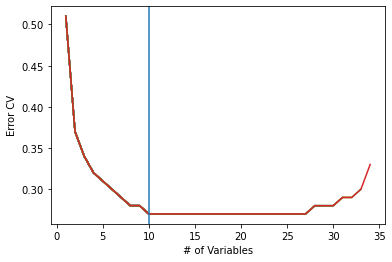

In [24]:
enumerate_errors = enumerate(errors)
predictors = []
average_scores = []
list_errors = list((enumerate_errors))
min_val = max(errors)
for i in list((list_errors)):
    predictors.append(i[0]+1)
    average_scores.append(abs(i[1]))
    plt.plot(predictors,average_scores)
minimum_value = average_scores.index(min(average_scores)) + 1 # adding one to get the true number of variables to comensate for the index counting that begins with 0
minimum_value
plt.xlabel('# of Variables')
plt.ylabel('Error CV')
plt.axvline(x=minimum_value)# plotting the line that identifies the number of variables where MSE is the lowest 

The graph shows that the best number of dependent variables is 10. We then go back up to our feture seection model and idetify that 'GrLivArea', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'ESTIMATEDPOPULATION'.

### Ordinal Variable Selection

In [25]:
# Define a dictionary for encoding target variable BsmtExposure
enc_bsmtexp={'Gd':4,'Av':3,'Mn':2,'No':1,'NA':0}
#Encoding BsmtExposure column with mapped values as encoded in th dictionary above
df_final['BsmtExposure']=df_final['BsmtExposure'].map(enc_bsmtexp)

# Define a dictionary for encoding target variable BsmtCond
enc_bsmtqu={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0}
#Encoding BsmtQual column with mapped values as encoded in th dictionary above
df_final['BsmtQual']=df_final['BsmtQual'].map(enc_bsmtqu)

# Define a dictionary for encoding target variable basement condtition finsih type 1
enc_bsmtfint1={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
#Encoding BsmtQual column with mapped values as encoded in th dictionary above
df_final['BsmtFinType1']=df_final['BsmtFinType1'].map(enc_bsmtfint1)

# Define a dictionary for encoding target variable basement condtition finsih type 2
enc_bsmtfint2={'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0}
#Encoding BsmtQual column with mapped values as encoded in th dictionary above
df_final['BsmtFinType2']=df_final['BsmtFinType2'].map(enc_bsmtfint2)

# Define a dictionary for encoding target variable 'Electrical'
enc_elec={'SBrkr':4,'FuseA':3,'FuseF':2,'FuseP':1,'Mix':0}
#Encoding Electrical column with mapped values as encoded in the dictionary above
df_final['Electrical']=df_final['Electrical'].map(enc_elec)

# Define a dictionary for encoding target variable ExtrCond
enc_ExCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
#Encoding ExterCond column with mapped values as encoded in th dictionary above
df_final['ExterCond']=df_final['ExterCond'].map(enc_ExCond)

# Define a dictionary for encoding target variable ExtrCond
enc_ExCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
#Encoding ExterCond column with mapped values as encoded in th dictionary above
df_final['ExterCond']=df_final['ExterCond'].map(enc_ExCond)

#Define a dictionary for encoding target variable ExtrQual
enc_ExCond={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
#Encoding ExterQual column with mapped values as encoded in th dictionary above
df_final['ExterQual']=df_final['ExterQual'].map(enc_ExCond)

#Define a dictionary for encoding target variable Functional (Homefunctionality)
enc_func={'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}
#Encoding Functional column with mapped values as encoded in th dictionary above
df_final['Functional']=df_final['Functional'].map(enc_func)

# Define a dictionary for encoding target variable GareageCondition
enc_GC={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0}
#Encoding GarageCond column with mapped values as encoded in th dictionary above
df_final['GarageCond']=df_final['GarageCond'].map(enc_GC)

# Define a dictionary for encoding target variable GareageFinish
enc_GF={'Fin':3,'RFn':2,'Unf':1,'NA':0}
#Encoding GarageFinish column with mapped values as encoded in th dictionary above
df_final['GarageFinish']=df_final['GarageFinish'].map(enc_GF)

# Define a dictionary for encoding target variable GareageQuality
enc_GQ={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0}
#Encoding GarageCond column with mapped values as encoded in th dictionary above
df_final['GarageQual']=df_final['GarageQual'].map(enc_GQ)

# Define a dictionary for encoding target variable GareageQuality
enc_Heat={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0}
#Encoding GarageCond column with mapped values as encoded in th dictionary above
df_final['HeatingQC']=df_final['HeatingQC'].map(enc_Heat)

# Define a dictionary for encoding target variable KitchenQuality
enc_kitchen={'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
#Encoding KitchenQual column with mapped values as encoded in th dictionary above
df_final['KitchenQual']=df_final['KitchenQual'].map(enc_kitchen)

# Define a dictionary for encoding target variable LandSlope
enc_LS={'Gtl':2,'Mod':1,'Sev':0}
#Encoding LandSlope column with mapped values as encoded in th dictionary above
df_final['LandSlope']=df_final['LandSlope'].map(enc_LS)

# Define a dictionary for encoding target variable LandSlope
enc_Lots={'Reg':3,'IR1':2,'IR2':1,'IR3':0}
#Encoding LotShape column with mapped values as encoded in th dictionary above
df_final['LotShape']=df_final['LotShape'].map(enc_Lots)

# Define a dictionary for encoding target variable PavedDrive
enc_pav={'Y':2,'P':1,'N':0}
#Encoding PavedDrive column with mapped values as encoded in th dictionary above
df_final['PavedDrive']=df_final['PavedDrive'].map(enc_pav)

# Define a dictionary for encoding target variable Utilities
enc_uti={'AllPub':3,'NoSewr':2,'NoSeWa':1,'ELO':0}
#Encoding Utilities column with mapped values as encoded in th dictionary above
df_final['Utilities']=df_final['Utilities'].map(enc_uti)


In [26]:
xo=df_final[['Utilities','PavedDrive','OverallQual','OverallCond','LotShape','LandSlope','KitchenQual','HeatingQC','GarageQual','GarageFinish','GarageCond','Functional','ExterQual','ExterCond','Electrical','BsmtFinType2','BsmtFinType1','BsmtQual','BsmtExposure','BsmtCond']]
yo=df_final['SalePrice']
xo=xo.drop(['ExterCond'], axis=1)

In [27]:
ord_final=list()
i = 0
for var in xo: 
    var = str(var)
    f = 'SalePrice ~' +  '(' + var + ')'
    i += 1
    print('\nRegression of SalePrice on ' + var + ' (nominal variable)')
    linear_reg = smf.ols(formula = f, data=df_final).fit()
    #print(linear_reg.summary())
    pvalues_list = linear_reg.pvalues.tolist()
    Reg_list=linear_reg.rsquared.tolist()
    if all(pvalues < 0.05 for pvalues in pvalues_list): 
        print("" + var + " is statistically significant")
        print('R-squared: ', linear_reg.rsquared)
        if (linear_reg.rsquared>0.2):
            ord_final.append(var)
        #sns.catplot(x=str(var), y='SalePrice', kind="violin", data=df_final)
        #plt.show()
    #else: 
        #print(" " + var + " is statistically insignificant")
        #print('R-squared: ', linear_reg.rsquared)
    #print("\n")
print(ord_final)


Regression of SalePrice on Utilities (nominal variable)
Utilities is statistically significant
R-squared:  2.220446049250313e-16

Regression of SalePrice on PavedDrive (nominal variable)
PavedDrive is statistically significant
R-squared:  0.03296035964419064

Regression of SalePrice on OverallQual (nominal variable)
OverallQual is statistically significant
R-squared:  0.6354563582066872

Regression of SalePrice on OverallCond (nominal variable)
OverallCond is statistically significant
R-squared:  0.020265527155097773

Regression of SalePrice on LotShape (nominal variable)
LotShape is statistically significant
R-squared:  0.0939241404353236

Regression of SalePrice on LandSlope (nominal variable)

Regression of SalePrice on KitchenQual (nominal variable)
KitchenQual is statistically significant
R-squared:  0.45152818858646737

Regression of SalePrice on HeatingQC (nominal variable)

Regression of SalePrice on GarageQual (nominal variable)

Regression of SalePrice on GarageFinish (nomin

We then conduct a filtering and for the purpose of our project we only shortlist variables which are statisticaly significant (p-value less than 0.05)and with the R Sqare value greator than 0.2 (conservative assumption). This criteria results in 5 indicators which are 'OverallQual', 'KitchenQual', 'GarageFinish', 'ExterQual', 'BsmtQual'

### Nominal Variable Selection

According to the data_description.txt file, there are 23 nominal variables. However, we removed the nominal variables Alley and Misc Feature removed given the number of NAs. <br>
We will perform one-hot encoding only on the nominal variables because these type of variables do not have any kind of ordinal relationship.

First, lets create a list with the column names of the nominal variables.

We will assess the importance of each nominal and ordinal variables. 
1. We create a loop that will iterate through the list that contains the names of the categorical variables. 
2. In each iteration, we construct the formula (f) that will be passed to the ordinary least squares (ols) model. Hence, we regress SalePrice on one categorical variable. Note, we put c() to indicate we are dealing with a categorical variable. 
3. We have done one-hot encoding for nominal variables and integer encoding for ordinal variables. Therefore, we will obtain coefficients that correspond to the intercept and coefficients. 
3. We retrieve the pvalues from the the coefficients and intercept. In the case of nominal variables, if all variables are significant, i.e. pvalue < 0.05, we consider the nominal variable to be relevant and we keep it for our models. 

In the case of nominal variables, we find that Central Air (whether a house has air conditioning system) and LandContour (flatness of property) are important. We create a boxplot for SalePrice and the selected nominal variables. 

The boxplot of SalePrice and Central Air, shows that the IQR is larger when the house has Central Air. We see that the median value varies across whether a house has central air or not. <br>

The boxplot of SalePrice and LandContour, shows that the median value varies across the levels of LandContour. <br>

In [28]:
cat_nom_vars = ['BldgType',
'CentralAir',
'Condition1',
'Condition2',
'Exterior1st',
'Exterior2nd',
'Foundation',
'GarageType',
'Heating',
'HouseStyle',
'LandContour',
'LotConfig',
'MSSubClass',
'MSZoning',
'MasVnrType',
'Neighborhood',
'RoofMatl',
'RoofStyle',
'SaleCondition',
'SaleType',
'Street'
]


Regression of SalePrice on BldgType (nominal variable)

None of the dummy variables of: BldgType are statistically significant
R-squared:  0.029964342848632253



Regression of SalePrice on CentralAir (nominal variable)

All the dummy variables of: CentralAir are statistically significant
R-squared:  0.04191534515644335


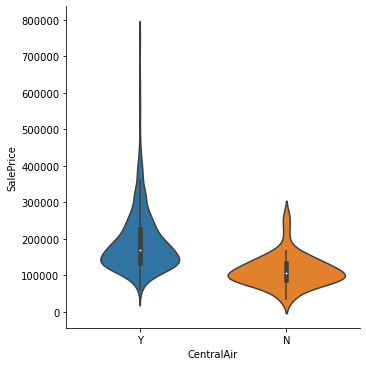




Regression of SalePrice on Condition1 (nominal variable)

None of the dummy variables of: Condition1 are statistically significant
R-squared:  0.031842833512712



Regression of SalePrice on Condition2 (nominal variable)

None of the dummy variables of: Condition2 are statistically significant
R-squared:  0.011428598745075735



Regression of SalePrice on Exterior1st (nominal variable)

None of the dummy variables of: Exterior1st are statistically significant
R-squared:  0.18198760073509668



Regression of SalePrice on Exterior2nd (nominal variable)

None of the dummy variables of: Exterior2nd are statistically significant
R-squared:  0.18465266836438798



Regression of SalePrice on Foundation (nominal variable)

None of the dummy variables of: Foundation are statistically significant
R-squared:  0.2762499514117579



Regression of SalePrice on GarageType (nominal variable)

None of the dummy variables of: GarageType are statistically significant
R-squared:  0.21253068949493015




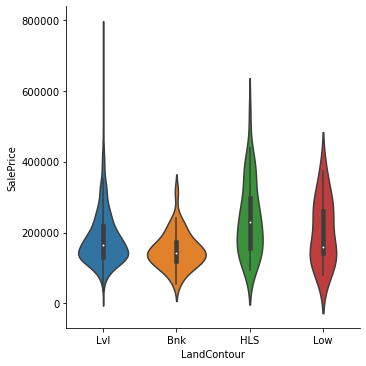




Regression of SalePrice on LotConfig (nominal variable)

None of the dummy variables of: LotConfig are statistically significant
R-squared:  0.036152730242265285



Regression of SalePrice on MSSubClass (nominal variable)

None of the dummy variables of: MSSubClass are statistically significant
R-squared:  0.24258800382514245



Regression of SalePrice on MSZoning (nominal variable)

None of the dummy variables of: MSZoning are statistically significant
R-squared:  0.11377237102953763



Regression of SalePrice on MasVnrType (nominal variable)

None of the dummy variables of: MasVnrType are statistically significant
R-squared:  0.19882395795145258



Regression of SalePrice on Neighborhood (nominal variable)

None of the dummy variables of: Neighborhood are statistically significant
R-squared:  0.5479319301529029



Regression of SalePrice on RoofMatl (nominal variable)

None of the dummy variables of: RoofMatl are statistically significant
R-squared:  0.029255804579570333



Regres

In [29]:
i = 0
for var in cat_nom_vars: 
    var = str(cat_nom_vars[i])
    f = 'SalePrice ~' + ' C' + '(' + var + ')'
    i += 1
    print('\nRegression of SalePrice on ' + var + ' (nominal variable)')
    linear_reg = smf.ols(formula = f, data=df_final).fit()
    #print(linear_reg.summary())
    pvalues_list = linear_reg.pvalues.tolist()
    if all(pvalue < 0.05 for pvalue in pvalues_list): 
        print("\nAll the dummy variables of: " + var + " are statistically significant")
        print('R-squared: ', linear_reg.rsquared)
        sns.catplot(x=str(var), y='SalePrice', kind="violin", data=df_final)
        plt.show()
    else: 
        print("\nNone of the dummy variables of: " + var + " are statistically significant")
        print('R-squared: ', linear_reg.rsquared)
    print("\n")

In [30]:
#Lets get dummy variables for the selected nominal variables 
df_final = pd.get_dummies(df_final, prefix=['LandContour', 'CentralAir'], columns=['LandContour', 'CentralAir'])

### Collecting the variabes

In [31]:
#shortlisted quantetative variables
extraction_quantetative = quant_variables_std[['GrLivArea', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'ESTIMATEDPOPULATION', 'SalePrice']]
#shortlisted nominal variables
extracted_nominal = df_final[["LandContour_Bnk", "LandContour_HLS", "LandContour_Low", "LandContour_Lvl", "CentralAir_N", "CentralAir_Y"]]
#shortlisted ordinal variables
extract_ordinal = df_final[["OverallQual", "KitchenQual", "GarageFinish", "ExterQual", "BsmtQual"]]


#we now create a column called new on unique values for each row so we can connect all dataframe with a join on the column "new"
extraction_quantetative['new'] = range(1, len(extraction_quantetative.index)+1)
extracted_nominal['new'] = range(1, len(extracted_nominal.index)+1)
extract_ordinal['new'] = range(1, len(extract_ordinal.index)+1)



In [32]:
# merging quantetative and nominal variables we shortlisted
quantetative_nominal = pd.merge(extraction_quantetative, extracted_nominal, how='inner',on=['new']) 
#quantetative_nominal

In [33]:
# merging quantetative_nominal and ordinal variables we shortlisted
quantetative_nominal_ordinal = pd.merge(quantetative_nominal, extract_ordinal, how='inner',on=['new']) 
quantetative_nominal_ordinal

,GrLivArea,MasVnrArea,BsmtFullBath,Fireplaces,GarageCars,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,ESTIMATEDPOPULATION,...,LandContour_HLS,LandContour_Low,LandContour_Lvl,CentralAir_N,CentralAir_Y,OverallQual,KitchenQual,GarageFinish,ExterQual,BsmtQual
0,0.340286,0.437796,1.133375,-0.959652,0.169458,-0.184349,0.907607,0.965784,0.808159,-0.751110,...,0,0,1,0,1,7,4,2,4,4
1,0.484986,0.260684,1.133375,0.631820,0.169458,-0.184349,-0.361142,0.901126,0.760101,-0.751110,...,0,0,1,0,1,7,4,2,4,4
2,0.353614,-0.583204,1.133375,0.631820,1.690309,-0.184349,0.273232,-1.879169,-0.777740,0.398619,...,0,0,1,0,1,7,4,1,3,3
3,1.269408,1.240010,1.133375,0.631820,1.690309,-0.184349,1.541981,0.868797,0.663986,0.627156,...,0,0,1,0,1,8,4,2,4,4
4,-0.322284,-0.583204,1.133375,-0.959652,0.169458,-0.184349,-0.995516,0.642494,0.423698,0.610968,...,0,0,1,0,1,5,3,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.220338,-0.583204,-0.825273,0.631820,0.169458,-0.184349,0.273232,0.836468,0.663986,-3.616198,...,0,0,1,0,1,6,3,2,3,4
1064,1.031416,0.036689,1.133375,2.223293,0.169458,-0.184349,0.273232,0.157559,0.087296,0.640678,...,0,0,1,0,1,6,3,1,3,4
1065,1.539768,-0.583204,-0.825273,2.223293,-1.351393,-0.184349,1.541981,-1.038615,0.952332,0.640678,...,0,0,1,0,1,7,4,2,5,3
1066,-0.863003,-0.583204,1.133375,-0.959652,-1.351393,-0.184349,-0.995516,-0.747654,0.471756,0.640678,...,0,0,1,0,1,5,4,1,3,3


## Answer 1

Our excercise of identifying key variables that have an impact on the sale price is complete.

We have identified that following are key variables which are significant by each category type:

A) Quantetative Variables:

    1) GrLivArea
    
    2) MasVnrArea	
    
    3) BsmtFullBath	
    
    4)Fireplaces
    
    5)GarageCars
    
    6)KitchenAbvGr
    
    7)TotRmsAbvGrd
    
    8)YearBuilt
    
    9)YearRemodAdd
    
    10) Estimate Population
    
    
 B) Ordinal Variables:

    1) OverallQual
    
    2) KitchenQual
    
    3) GarageFinish
    
    4) ExterQual
    
    5) BsmtQual
    
C) Nominal Variables:

    1) LandContour_Bnk
    
    2) LandContour_HLS
    
    3) LandContour_Low
    
    4) LandContour_Lvl
    
    5) CentralAir_N
    
    6) CentralAir_Y



### CONCLUSION:

#### We can inform real etate agents to pay special attention to the following charecteristics of the house when deciding if they should purchase the house as an invetment oppertunity to sell later. This can also help decide if they should agree to take the property under them to sell on behalf of a client. This will help them with business practices.

In [34]:
quantetative_nominal_ordinal.isnull().values.any()#Checking if therer are any null variables.

False

We see that therer are no Null values. Our dataset is colmplete and ready for further analysis.

### Q2 How can we create a model that is best able to predict the Sale price of the house if house charecteristics are provided 

How can we create a model that is best able to predict the Sale Price of the house if house charecteristics are provided. This will be very helpful for real estate agents to make business decisions about houses in their protfolios. This will tell them what would be the expected sale price of the house in their protfolio based on the house charecteristics. This is a regression problem. 

To identify the best predictions we will use multiple models and see which is best able to predict the sale price of the house.

We will use three models for our analysis:

1) Linear Regression

2) Ridge

3) Lasso



In [35]:
#Creating X and Y for our analysis 
x = quantetative_nominal_ordinal.drop(["SalePrice", "new"], axis=1)# we drop SalePrice since it is the dependent variable. We drop new as it was used for joining purposes and not required anymore
y = quantetative_nominal_ordinal["SalePrice"]

In [36]:
#Spliting into x, y train and test. We split them on a ratio such that train is 80% of data and test is 20% of data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Split x and y into train andtest set


### Linar Regression

In [37]:
lm = LinearRegression()#creating object of Linear regression
lm.fit(x_train,y_train)# fitting our X-train and y_train to our model
print("Train R-squared: ", lm.score(x_train,y_train))#calculating R square
print('Train MSE: %.2f'% mean_squared_error(y_train, lm.predict(x_train)))#calculating MSE

print("Testing R-squared: ", lm.score(x_test,y_test))#calculating R square
print('Test MSE: %.2f'% mean_squared_error(y_test, lm.predict(x_test)))#calculating MSE

Train R-squared:  0.8021207848132665
Train MSE: 0.20
Testing R-squared:  0.7996895624335724
Test MSE: 0.20


### Polynomial Regression

In [38]:
lm_poly = LinearRegression()#calling object of polynomial regression

for i in range(1,7):#creating loop for different degrees
    poly = PolynomialFeatures(degree=i)
    x_poly_train = poly.fit_transform(x_train)#creating variable for fitting our model
    x_poly_test = poly.fit_transform(x_test)
    lm_poly.fit(x_poly_train, y_train)#fitting the model
    print("------------")
    print("Degree: ",i)
    print("Train R-squared: ", lm.score(x_train,y_train))#Dispalying results for regression
    print('Train MSE: %.2f'% mean_squared_error(y_train, lm_poly.predict(x_poly_train)))
    print("Testing R-squared: ", lm.score(x_test,y_test))
    print('Test MSE: %.2f'% mean_squared_error(y_test, lm_poly.predict(x_poly_test)))

------------
Degree:  1
Train R-squared:  0.8021207848132665
Train MSE: 0.20
Testing R-squared:  0.7996895624335724
Test MSE: 0.20
------------
Degree:  2
Train R-squared:  0.8021207848132665
Train MSE: 0.08
Testing R-squared:  0.7996895624335724
Test MSE: 2284096011925790464.00
------------
Degree:  3
Train R-squared:  0.8021207848132665
Train MSE: 0.00
Testing R-squared:  0.7996895624335724
Test MSE: 1050.43
------------
Degree:  4
Train R-squared:  0.8021207848132665
Train MSE: 0.00
Testing R-squared:  0.7996895624335724
Test MSE: 31.68
------------
Degree:  5
Train R-squared:  0.8021207848132665
Train MSE: 0.00
Testing R-squared:  0.7996895624335724
Test MSE: 23593889983.85
------------
Degree:  6
Train R-squared:  0.8021207848132665
Train MSE: 0.00
Testing R-squared:  0.7996895624335724
Test MSE: 6824179.33


from the rsults we have we see that linear regression has an adjusted R square of about 0.8 and MSE of 0.2. When comparing this with polynomial regression we see that the R square does not improve by much for increasing degress and the MSE falls to almost 0 for degress greator that 1. We fear that polynomial model might be over fitting. We will keep the linear regression model as the main choice so far

### Ridge

**Identifying best Alpha**

In [39]:
model_ridge = Ridge(normalize=True)#creating object of Ridge regression
errors= []
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_ridge.set_params(alpha=a)#setting params for the model at different alpha values 
    model_ridge.fit(x_train, y_train)
    CV_error = np.mean(cross_val_score(model_ridge, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))#calculating cv errors for our model
    coeficents.append(model_ridge.coef_)
    errors.append(CV_error)

In [40]:
error = np.abs(errors)
print("Min error: ", np.min(error))#calculating min error for ridge model 
ridge_minError = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])
print("Best alpha: ", alphas[index_minerr])
best_alpha = float(alphas[index_minerr])#setting the value of best alpha to the variable to be called on later 
best_alpha

Min error:  0.21378894887244687
Best alpha:  [0.14033215]


0.14033215376054847

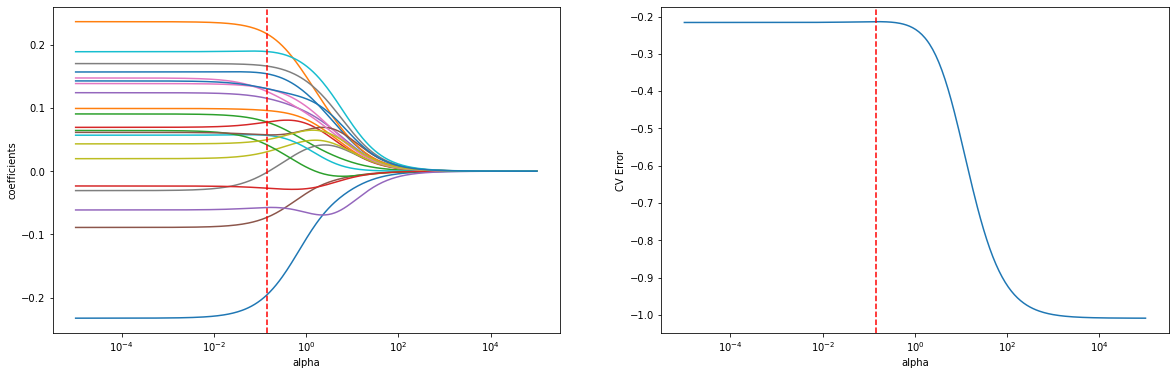

In [41]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')#creating a line for our best alpha
ax.set_xscale('log')#formatting
plt.xlabel('alpha')#formatting
plt.ylabel('coefficients')#formatting
plt.axis('tight')#formatting

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')#creating a line for our best alpha
ax.set_xscale('log')#formatting
plt.xlabel('alpha')#formatting
plt.ylabel('CV Error')#formatting
plt.axis('tight')#formatting

plt.show()
print()

In [42]:
model_ridgeCV = RidgeCV(cv=10, normalize=True,scoring="neg_mean_squared_error", alphas = np.logspace(-5, 5, 300))
model_ridgeCV.fit(x_train, y_train)#calculating Ridge CV score on our train set 

print("Ridge - alpha: "+str(model_ridgeCV.alpha_))

Ridge - alpha: 0.14033215376054847


Here we see that if we use RidgeCV method we get the same best alpha value of  0.14033215376054847. This shows that our model has been trained well

In [43]:
model_ridge_1 = Ridge()#creating object of ridge for train set 
model_ridge_1.set_params(alpha=best_alpha)
model_ridge_1.fit(x_train, y_train)#fitting the model

model_ridge_2 = Ridge()#creating object of ridge for test set 
model_ridge_2.set_params(alpha=best_alpha)
model_ridge_2.fit(x_test, y_test)#fitting the model


Ridge(alpha=0.14033215376054847)

In [44]:
training_R_sqrd = model_ridge_1.score(X =x_train, y = y_train)
print("\nTrain R-squared: ", training_R_sqrd)#calculating R square
ridge_y_predicts_train = model_ridge_1.predict(x_train)#creating list for predictions
MSE_training = mean_squared_error(y_true = y_train, y_pred = ridge_y_predicts_train) 
print("Train Mean Squared Error:", MSE_training)

test_R_sqrd = model_ridge_2.score(X =x_test, y = y_test)
print("\nTest R-squared: ", test_R_sqrd)#calculating R square
ridge_y_predicts_test = model_ridge_2.predict(x_test)#creating list for predictions
MSE_testing = mean_squared_error(y_true = y_test, y_pred = ridge_y_predicts_test) 
print("Test Mean Squared Error:", MSE_testing)


Train R-squared:  0.8021206864521185
Train Mean Squared Error: 0.19907897429425703

Test R-squared:  0.8682587422423629
Test Mean Squared Error: 0.12834662161898425


### Lasso

In [45]:
model_lasso = Lasso(normalize=True)#creating object of lasso regression
errors= []#list for errors
coeficents = []

alphas = np.logspace(-5, 5, 300)
for a in alphas:
    model_lasso.set_params(alpha=a)#creating object of lasso regression at multiple alpha values 
    model_lasso.fit(x_train, y_train)#fitting our model with train
    CV_error = np.mean(cross_val_score(model_lasso, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    coeficents.append(model_lasso.coef_)
    errors.append(CV_error)

In [46]:
error = np.abs(errors)
print("Min error: ", np.min(error))
lasso_minerr = np.min(error)
index_minerr = (np.where(error == np.min(error))[0])+1#adding one since the index start from 0
print("Best alpha: ", alphas[index_minerr])#printing our best alpha

Min error:  0.21556162844239854
Best alpha:  [0.00023509]


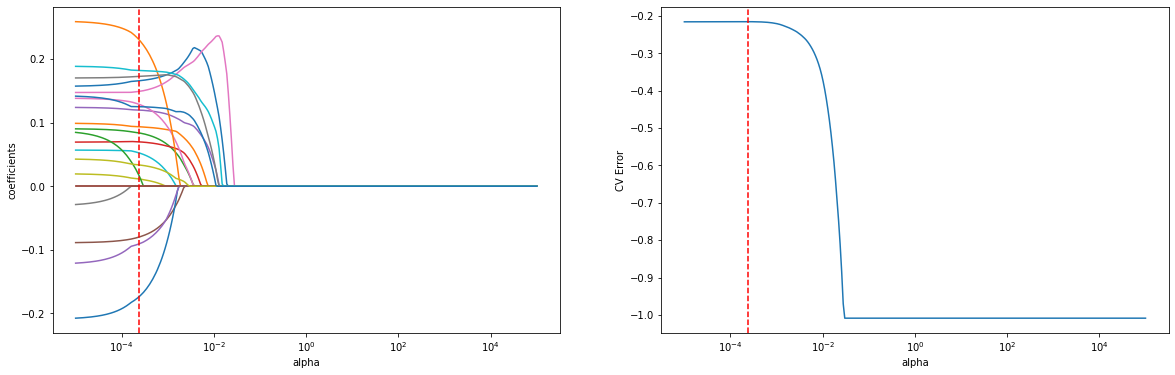

In [47]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coeficents)#ploting our different alpha values
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')
ax.set_xscale('log')#formatting
plt.xlabel('alpha')#formatting
plt.ylabel('coefficients')#formatting
plt.axis('tight')#formatting

plt.subplot(122)
ax = plt.gca()
ax.plot(alphas, errors)
plt.axvline(x=alphas[index_minerr], color='r', linestyle='--')#creating line to show the best alpha
ax.set_xscale('log')#formatting
plt.xlabel('alpha')#formatting
plt.ylabel('CV Error')#formatting
plt.axis('tight')#formatting

plt.show()

In [48]:
model_lasso_1 = Lasso()#creating object of Lasso Regression
model_lasso_1.set_params(alpha=best_alpha)
model_lasso_1.fit(x_train, y_train)#fitting the model

model_lasso_2 = Lasso()#creating object of ridge for test set 
model_lasso_2.set_params(alpha=best_alpha)
model_lasso_2.fit(x_test, y_test)#fitting the model

Lasso(alpha=0.14033215376054847)

In [49]:
training_R_sqrd = model_lasso_1.score(X =x_train, y = y_train)
print("\nTrain R-squared: ", training_R_sqrd)#calculating R square
lasso_y_predicts_train = model_lasso_1.predict(x_train)#creating list for predictions
MSE_training = mean_squared_error(y_true = y_train, y_pred = lasso_y_predicts_train) 
print("Train Mean Squared Error:", MSE_training)

test_R_sqrd = model_lasso_2.score(X =x_test, y = y_test)
print("\nTest R-squared: ", test_R_sqrd)#calculating R square
lasso_y_predicts_test = model_lasso_2.predict(x_test)#creating list for predictions
MSE_testing = mean_squared_error(y_true = y_test, y_pred = lasso_y_predicts_test) 
print("Test Mean Squared Error:", MSE_testing)


Train R-squared:  0.709760388540515
Train Mean Squared Error: 0.29199921463714096

Test R-squared:  0.7665505043503731
Test Mean Squared Error: 0.22743409767961184


### Comparing Regression Results

In [50]:
print("Linear Regression Results")
print("Train R-squared: ", lm.score(x_train,y_train))#calculating R square
print('Train MSE: %.2f'% mean_squared_error(y_train, lm.predict(x_train)))#calculating MSE
print("Testing R-squared: ", lm.score(x_test,y_test))#calculating R square
print('Test MSE: %.2f'% mean_squared_error(y_test, lm.predict(x_test)))#calculating MSE
print('\n')

print("Ridge Regression Results")
training_R_sqrd = model_ridge_1.score(X =x_train, y = y_train)
print("Train R-squared: ", training_R_sqrd)#calculating R square
ridge_y_predicts_train = model_ridge_2.predict(x_train)# prediction results based on the model
MSE_training = mean_squared_error(y_true = y_train, y_pred = ridge_y_predicts_train) 
print("Train Mean Squared Error:", MSE_training)
test_R_sqrd = model_ridge_2.score(X =x_test, y = y_test)
print("Test R-squared: ", test_R_sqrd)#calculating R square
ridge_y_predicts_test = model_ridge_2.predict(x_test)# prediction results based on the model
MSE_testing = mean_squared_error(y_true = y_test, y_pred = ridge_y_predicts_test) 
print("Test Mean Squared Error:", MSE_testing)
print('\n')


print("Lasso Regression Results")
training_R_sqrd = model_lasso_1.score(X =x_train, y = y_train)
print("Train R-squared: ", training_R_sqrd)#calculating R square
lasso_y_predicts_train = model_lasso_1.predict(x_train)# prediction results based on the model
MSE_training = mean_squared_error(y_true = y_train, y_pred = lasso_y_predicts_train) 
print("Train Mean Squared Error:", MSE_training)
test_R_sqrd = model_lasso_2.score(X =x_test, y = y_test)
print("Test R-squared: ", test_R_sqrd)#calculating R square
lasso_y_predicts_test = model_lasso_2.predict(x_test)# prediction results based on the model
MSE_testing = mean_squared_error(y_true = y_test, y_pred = lasso_y_predicts_test) 
print("Test Mean Squared Error:", MSE_testing)

Linear Regression Results
Train R-squared:  0.8021207848132665
Train MSE: 0.20
Testing R-squared:  0.7996895624335724
Test MSE: 0.20


Ridge Regression Results
Train R-squared:  0.8021206864521185
Train Mean Squared Error: 0.24864278015607494
Test R-squared:  0.8682587422423629
Test Mean Squared Error: 0.12834662161898425


Lasso Regression Results
Train R-squared:  0.709760388540515
Train Mean Squared Error: 0.29199921463714096
Test R-squared:  0.7665505043503731
Test Mean Squared Error: 0.22743409767961184


## Answer 2

From our results above we see that there is not substantial difference between the R square and MSE between the three models. Based on pure measurement we can see that the Ridge regression method is best at making the best predictions with the least MSE score of 0.1283466 and also has the highest R square value of 0.8682587

For the purpose of our project we will use this regression model to predict the sales price based on the charecteristics of the house. Real estate agents can use of Ridge model to decide between houses on their predicted value. 

**The Real Sale Price for test set**

In [51]:
print("Ridge Regression Results")
training_R_sqrd = model_ridge_1.score(X =x_train, y = y_train)
print("Train R-squared: ", training_R_sqrd)#calculating R square
ridge_y_predicts_train = model_ridge_2.predict(x_train)# prediction results based on the model
MSE_training = mean_squared_error(y_true = y_train, y_pred = ridge_y_predicts_train) 
print("Train Mean Squared Error:", MSE_training)
test_R_sqrd = model_ridge_2.score(X =x_test, y = y_test)
print("Test R-squared: ", test_R_sqrd)#calculating R square
ridge_y_predicts_test = model_ridge_2.predict(x_test)# prediction results based on the model
MSE_testing = mean_squared_error(y_true = y_test, y_pred = ridge_y_predicts_test) 
print("Test Mean Squared Error:", MSE_testing)
print('\n')

Ridge Regression Results
Train R-squared:  0.8021206864521185
Train Mean Squared Error: 0.24864278015607494
Test R-squared:  0.8682587422423629
Test Mean Squared Error: 0.12834662161898425




The results show that as the R suqare of Ridge regression is 0.80, it means that 80 % of the variance in SalePrice is explained by the independt variables we have chosen. We believe that this R square is good enough to allow the real estate agents to get a relatively accurate prediction of a potential houses on the bases of its cheracteristics. Based on this the agents can try to improve the condition of the house by maing the necessary  changes. Or they could also focus on which houses they should accept to sell from potential sellers. This helps them maximize revenue and made efficient decisions. 



Additionaly, the real estate agents can identify which charecteristics of te house have more impact on the sale price. Below we explore the coefficients of our Ridge regresssion model

In [52]:
ridge_model = model_ridge_2.fit(x_test, y_test)
Ridge_coefficients = ridge_model.coef_
print("\nThe coefficients that correspond to the best alpha are: ")
Ridge_coefficients
predictorslist = x.columns.values.tolist()
i = 0 
for predictor in predictorslist: 
    print(predictor, "=", Ridge_coefficients[i])
    i += 1


The coefficients that correspond to the best alpha are: 
GrLivArea = 0.542017534872436
MasVnrArea = 0.034934589742887996
BsmtFullBath = 0.10301625518021902
Fireplaces = 0.06729024187187344
GarageCars = 0.14366447448335792
KitchenAbvGr = -0.06304828110696836
TotRmsAbvGrd = -0.12635293169281717
YearBuilt = 0.03933388329369738
YearRemodAdd = -0.02625153021549484
ESTIMATEDPOPULATION = 0.06316964674411223
LandContour_Bnk = -0.13794920702884372
LandContour_HLS = -0.014990436080093025
LandContour_Low = 0.314503489397455
LandContour_Lvl = -0.1615638462886278
CentralAir_N = -0.05459201410594566
CentralAir_Y = 0.0545920141059343
OverallQual = 0.11828800032362351
KitchenQual = 0.11513054918137254
GarageFinish = 0.029680121855373245
ExterQual = 0.04704015074927949
BsmtQual = 0.27328299922107496


### Note: Our results are standerdized



The results above show that some varioables have possitive impact on the Sale price while the others haev a negative impact.

Our results show that GrLivArea (Above grade (ground) living area square feet) has the most significant positive impact on Sale Price. The coeeffcient of 0.542 suggests that with every one foot increase in GrLivArea, the sale price increases by 0.542 units holding all other variable constancs. 

We also see that LandContour_Low (The land countour is in a depression) has the second most significant positive impact on Sale Price. The coeeffcient of 0.314 suggests that if the house is in a depression it has a price increase of 0.31 ) holding all other variabes constant. This is an important information for real estaet agensts as they see that people in Ames prefer a house in depression. The agents can thus look for house in such land contour.

BsmtQual (Evaluates the height of the basement) has a coefficient of 0.27, suggesting that with evey one unit increase in basement height category, the SalePrice increases by 0.27 units. This is also important for the real estate agents as they now know that tenants like houses which have higher basement celing. 

In our results we also see that some variables are negatively asscoaiited to the Sale price. We see that LandContour_Bnk has a negative cooeficient of -0.1379. Banked  means that tere is a quick and significant rise from street grade to building. This shows that if this is true for the house the Sale price falls by 0.31 , holding all other relations constant. 

Other variables, the rise of which are negatively associated to the Sale Price are CentralAir_N, i.e. that the house does not have a centeral air conditioning; YearRemodAdd - menaing that more recently the house has been remodeled it is less desirable; TotRmsAbvGrd - people prefer prefers less to have more rooms above ground floor. 


We believe all this information will better help real estate in Ames, Iowa to better undersatnd what the market is looking for.





### Q3 Classification of Overall Condition of the house

The houses in the dataset have an overall ranking based on their features. We are trying to indeitify what are the physical properties of a house that best evaluate and classify its overall condition? This will allow real estat agents to classify a house into a unique measurable category and be able to compare all houses over a common classification. If they recieve all charecteristics of a house they can use this method to classifiy the house on a scale of 1 - 10. This will be a classification problem.

For the classification task, we will classify houses based on their overall quality condition. <br>
Overall Condition is an ordinal variable that rates the overall condition of the house. 10 is Very Excellent and 1 is Poor. <br>
We will also classify houses based on zip code <br>
Zip is a nominal variable that states where the zip code area where the house is. The zip code areas in Ames are: 50010, 50014, 50105.  m

**Classification for overall condition**

In [53]:
#We will add the Zip (nominal variable) and OverallCondition (ordinal variable) to our dataframe
#which contains the selected features, features that show to be relevant predictors. 
extraction_quantetative = quant_variables_std[['GrLivArea', 'MasVnrArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'KitchenAbvGr', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'ESTIMATEDPOPULATION', 'SalePrice']]
extracted_nominal = df_final[["LandContour_Bnk", "LandContour_HLS", "LandContour_Low", "LandContour_Lvl", "CentralAir_N", "CentralAir_Y", "Zip"]]
extract_ordinal = df_final[["OverallCond", "OverallQual", "KitchenQual", "GarageFinish", "ExterQual", "BsmtQual"]]

extraction_quantetative['new'] = range(1, len(extraction_quantetative.index)+1)

extracted_nominal['new'] = range(1, len(extracted_nominal.index)+1)

extract_ordinal['new'] = range(1, len(extract_ordinal.index)+1)


In [54]:
#quantetative_nominal = merge(extraction_quantetative, extracted_nominal, by = "new")
quantetative_nominal = pd.merge(extraction_quantetative, extracted_nominal, how='inner',on=['new']) 
quantetative_nominal_ordinal = pd.merge(quantetative_nominal, extract_ordinal, how='inner',on=['new']) 

In [55]:
quantetative_nominal_ordinal

,GrLivArea,MasVnrArea,BsmtFullBath,Fireplaces,GarageCars,KitchenAbvGr,TotRmsAbvGrd,YearBuilt,YearRemodAdd,ESTIMATEDPOPULATION,...,LandContour_Lvl,CentralAir_N,CentralAir_Y,Zip,OverallCond,OverallQual,KitchenQual,GarageFinish,ExterQual,BsmtQual
0,0.340286,0.437796,1.133375,-0.959652,0.169458,-0.184349,0.907607,0.965784,0.808159,-0.751110,...,1,0,1,50014,5,7,4,2,4,4
1,0.484986,0.260684,1.133375,0.631820,0.169458,-0.184349,-0.361142,0.901126,0.760101,-0.751110,...,1,0,1,50014,5,7,4,2,4,4
2,0.353614,-0.583204,1.133375,0.631820,1.690309,-0.184349,0.273232,-1.879169,-0.777740,0.398619,...,1,0,1,50010,5,7,4,1,3,3
3,1.269408,1.240010,1.133375,0.631820,1.690309,-0.184349,1.541981,0.868797,0.663986,0.627156,...,1,0,1,50010,5,8,4,2,4,4
4,-0.322284,-0.583204,1.133375,-0.959652,0.169458,-0.184349,-0.995516,0.642494,0.423698,0.610968,...,1,0,1,50010,5,5,3,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,0.220338,-0.583204,-0.825273,0.631820,0.169458,-0.184349,0.273232,0.836468,0.663986,-3.616198,...,1,0,1,50105,5,6,3,2,3,4
1064,1.031416,0.036689,1.133375,2.223293,0.169458,-0.184349,0.273232,0.157559,0.087296,0.640678,...,1,0,1,50010,6,6,3,1,3,4
1065,1.539768,-0.583204,-0.825273,2.223293,-1.351393,-0.184349,1.541981,-1.038615,0.952332,0.640678,...,1,0,1,50010,9,7,4,2,5,3
1066,-0.863003,-0.583204,1.133375,-0.959652,-1.351393,-0.184349,-0.995516,-0.747654,0.471756,0.640678,...,1,0,1,50010,6,5,4,1,3,3


In [56]:
quantetative_nominal_ordinal['OverallCond']

0       5
1       5
2       5
3       5
4       5
       ..
1063    5
1064    6
1065    9
1066    6
1067    6
Name: OverallCond, Length: 1068, dtype: int64

In [57]:
#Check if there are any NA
quantetative_nominal_ordinal.isnull().values.any()
#There are no NA, the merge was performed well 

False

The Overall Condition (categorical) variable has 10 classes, lets check the number of observations in each level: 

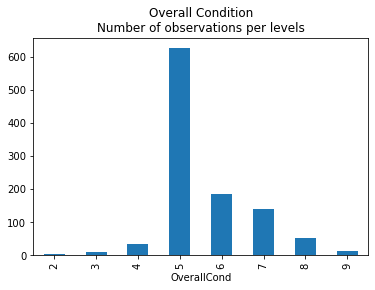

In [58]:
hist = quantetative_nominal_ordinal.groupby(['OverallCond']).size()
hist.plot(kind = "bar", title = "Overall Condition\nNumber of observations per levels")
plt.show()

In [59]:
quantetative_nominal_ordinal.groupby(['OverallCond']).size()

OverallCond
2      3
3     11
4     36
5    626
6    186
7    140
8     54
9     12
dtype: int64

Although the number of observations appear to be normally distributed, we see that the observations are skewed to the right. Furthermore, some classes do not have any observation, while others have very few. This can lead to problems when performing Cross Validation, because the number of samples in each class should be at least equal to the number of folds. 
Furthermore, it is recommended to use 5 or 10 folds. We will set the number of folds to 5 and restrict the number of classes in the Overall Cond variable, so we have at least 5 observations in each sample. 

The new classes of the ordinal categorical variable are: <br>

Excellent (1), includes the values of 10, 9, 8 for overall condition <br>
Average (2), includes the values of 7, 6, 5 for overall condition<br>
Poor (3), includes the values of 4, 3, 2, 1 for overall condition <br>

**Now, we will reassign the values of the new classes to the Overall Condition column**

In [60]:
quantetative_nominal_ordinal.loc[quantetative_nominal_ordinal.OverallCond > 7, 'OverallCond'] = 1

In [61]:
quantetative_nominal_ordinal.loc[(quantetative_nominal_ordinal.OverallCond > 0) & (quantetative_nominal_ordinal.OverallCond < 5) & (quantetative_nominal_ordinal.OverallCond != 1), 'OverallCond'] = 3

In [62]:
quantetative_nominal_ordinal.loc[(quantetative_nominal_ordinal.OverallCond > 4) & (quantetative_nominal_ordinal.OverallCond < 8), 'OverallCond'] = 2

In [63]:
x = quantetative_nominal_ordinal.drop(["OverallCond","new"], axis=1)
y = quantetative_nominal_ordinal["OverallCond"]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Split x and y into train and test set

KNN Classification<br>
Now we will train a KNN model. We will use the training dataset and we will also tune the KNN model to find the best K (number of neighbors) that yields the biggest accuracy. Then we will test the model (with selected K) using the testing data set. <br>

According to Band, A., the square root of the total number of observations should give a good K. We will use this value (sqrt(len(y_test)) = 32) as the maximum value in the range for looping through different values of K. <br>

References
https://towardsdatascience.com/how-to-find-the-optimal-value-of-k-in-knn-35d936e554eb

In [65]:
np.sqrt(len(y))


32.68026927673638

In [66]:
accuracy_KNN = []
list_neighbors = list(range(1,32))
for i in list_neighbors: 
    knn_overallqual = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(estimator = knn_overallqual, X = x_train, y = y_train, scoring = None, cv = 5) #Since I set scoring = None, it will automatically calculate accuracy, as we handling a KNN model 
    print("Iteration " + str(i), "K =", i)
    print(scores)
    print("Average accuracy (CV error) obtained from the 5 folds:", np.mean(scores))
    print("\n")
    accuracy_KNN.append(np.mean(scores))

Iteration 1 K = 1
[0.83625731 0.86549708 0.87134503 0.85380117 0.85882353]
Average accuracy (CV error) obtained from the 5 folds: 0.8571448228414171


Iteration 2 K = 2
[0.84210526 0.87134503 0.89473684 0.84795322 0.87058824]
Average accuracy (CV error) obtained from the 5 folds: 0.8653457172342621


Iteration 3 K = 3
[0.87134503 0.88304094 0.9122807  0.87134503 0.88235294]
Average accuracy (CV error) obtained from the 5 folds: 0.8840729274165806


Iteration 4 K = 4
[0.87719298 0.9005848  0.89473684 0.85964912 0.89411765]
Average accuracy (CV error) obtained from the 5 folds: 0.8852562779497765


Iteration 5 K = 5
[0.87719298 0.88304094 0.88888889 0.87134503 0.89411765]
Average accuracy (CV error) obtained from the 5 folds: 0.8829170966632267


Iteration 6 K = 6
[0.88304094 0.88304094 0.88888889 0.86549708 0.9       ]
Average accuracy (CV error) obtained from the 5 folds: 0.884093567251462


Iteration 7 K = 7
[0.87719298 0.87719298 0.89473684 0.88304094 0.89411765]
Average accuracy (CV

In [67]:
#Lets find the maximum accuracy value
ymaxvalue = max(accuracy_KNN)
list_neighbors
maxvalue_position = accuracy_KNN.index(max(accuracy_KNN))      
#Lets find the K that corresponds to the max accuracy value
bestK = list_neighbors[int(maxvalue_position)]

KNN_accuracy  = ymaxvalue

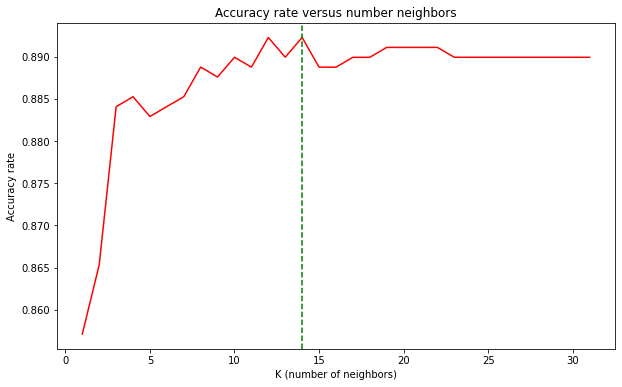


Best K for KNN Model: 14 
KNN's Accuracy: 0.892280701754386


In [68]:
plt.figure(figsize = (10,6))
plt.plot(list_neighbors, accuracy_KNN, color = "red")
plt.title("Accuracy rate versus number neighbors")
plt.xlabel('K (number of neighbors)')
plt.ylabel('Accuracy rate')
plt.axvline(x = bestK, color='green', linestyle='dashed')
plt.show()

print("\nBest K for KNN Model: " + str(bestK), "\nKNN's Accuracy:", KNN_accuracy)

**Now, we will retrain the KNN model with best K found. After that, we will test the model with the testing dataset.**

In [69]:
knn_overallqual = KNeighborsClassifier(n_neighbors = bestK)
knn_overallqual.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [70]:
knn_predictions = knn_overallqual.predict(x_test) #We get an array of the y_predictions (1-3)

**Let's see how well the selected KNN model (K = bestK) performed. For that, we will calculate the accuracy, print the classification report and confusion matrix**

In [71]:
cm_overallqual_KNN = confusion_matrix(y_true = y_test, y_pred = knn_predictions)
cr_overallqual_KNN = classification_report(y_true = y_test, y_pred = knn_predictions, zero_division='warn')
print(cr_overallqual_KNN)

              precision    recall  f1-score   support

           1       0.75      0.23      0.35        13
           2       0.91      0.99      0.95       192
           3       0.00      0.00      0.00         9

    accuracy                           0.91       214
   macro avg       0.55      0.41      0.43       214
weighted avg       0.86      0.91      0.87       214



Although the accuracy for the classes 1 and 2 is 0.75 and 0.91, the KNN model with K = 14 is not a good model. This model cannot predict any observations that would belong to the class 3. 

Confusion Matrix for KNN Model (K = bestK) 



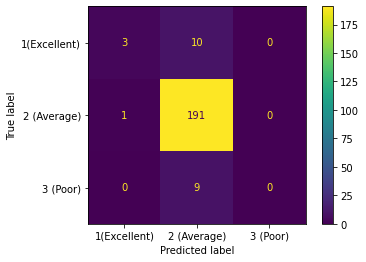

In [72]:
#Lets print the Confusion Matrix
print("Confusion Matrix for KNN Model (K = bestK) \n")
display_cm_overallqual_KNN = ConfusionMatrixDisplay(confusion_matrix = cm_overallqual_KNN, display_labels
                                                   = ['1(Excellent)', '2 (Average)', '3 (Poor)'])
display_cm_overallqual_KNN.plot()

In [73]:
print("Accuracy of KNN Model:",metrics.accuracy_score(y_true = y_test, y_pred = knn_predictions))
print("Precision of KNN Model, classes [1, 2, 3]:",metrics.precision_score(y_true = y_test, y_pred = knn_predictions, average = None))


Accuracy of KNN Model: 0.9065420560747663
Precision of KNN Model, classes [1, 2, 3]: [0.75       0.90952381 0.        ]


The class 1 (Excellent) has a precision of 0.75. This class is a easy to classify. <br>
The class 2 (Average) has a precision of 0.91. This class is very easy to classify. <br>
We have 3 TP, 1 FP and 10 FN for the class 1. We have 191 true positives (TP), 19 false positives (FP) and 0 false negatives (FN) for the class 2. 


**Now, we will train and test a Naive Bayes Model, to see if this model perform better.**

In [74]:
#Create and fit the model 
overallqual_nb = GaussianNB() 
overallqual_nb.fit(x_train, y_train)

GaussianNB()

In [75]:
#Test the model
nb_predictions = overallqual_nb.predict(x_test)
cm_overallqual_NB = confusion_matrix(y_true = y_test, y_pred = nb_predictions)
cr_overallqual_NB = classification_report(y_true = y_test, y_pred = nb_predictions)
print(cr_overallqual_NB)

              precision    recall  f1-score   support

           1       0.26      0.38      0.31        13
           2       0.96      0.55      0.70       192
           3       0.09      0.89      0.17         9

    accuracy                           0.56       214
   macro avg       0.44      0.61      0.39       214
weighted avg       0.88      0.56      0.66       214



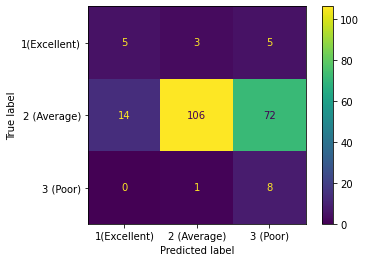

In [76]:
display_cm_overallqual_NB = ConfusionMatrixDisplay(confusion_matrix = cm_overallqual_NB, display_labels
                                                   = ['1(Excellent)', '2 (Average)', '3 (Poor)'])
display_cm_overallqual_NB.plot()

In [77]:
print("Accuracy of NB Model:",metrics.accuracy_score(y_true = y_test, y_pred = nb_predictions))
print("Precision of NB Model, classes [1, 2, 3]:",metrics.precision_score(y_true = y_test, y_pred = nb_predictions, average = None))

Accuracy of NB Model: 0.5560747663551402
Precision of NB Model, classes [1, 2, 3]: [0.26315789 0.96363636 0.09411765]


We see that the NB Model can predict more easily the Class 2 (Average) than the KNN Model, the precision is 0.96, whereas in KNN is 0.91. 
The NB Model can predict the class 3, however the accuracy is 0.09. This class is still hard to classify. <br>
Class 1 (Excellent)<br>
From the confusion matrix, we see that we have 5 TP, 9 FN and 14 FP. <br>
Class 2 (Average)<br>
From the confusion matrix, we see that we have 106 TP, 8 FN and 4 FP. <br>
Class 3 (Poor)<br>
From the confusion matrix, we see that we have 72 TP, 1 FN and 13 FP. <br>



### Decision Tree Classification

In [78]:
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

In [79]:
#We create a decision tree classifier object
decision_tree_overallqual = DecisionTreeClassifier() #Note that we are using the default values for the model
#Lets train the model 
decision_tree_overallqual.fit(x_train, y_train)
#Lets get the classification predictions  
dt_predictions = decision_tree_overallqual.predict(x_test)


In [80]:
#Create the confusion matrix and classification report objects 
cm_overallqual_dt = confusion_matrix(y_true = y_test, y_pred = dt_predictions)
cr_overallqual_dt = classification_report(y_true = y_test, y_pred = dt_predictions)
print(cr_overallqual_dt)

              precision    recall  f1-score   support

           1       0.17      0.08      0.11        13
           2       0.91      0.94      0.93       192
           3       0.22      0.22      0.22         9

    accuracy                           0.86       214
   macro avg       0.43      0.41      0.42       214
weighted avg       0.84      0.86      0.85       214



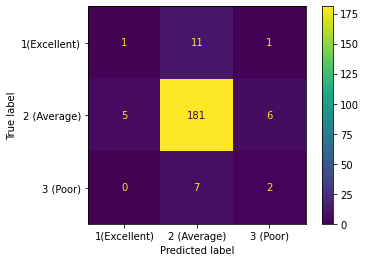

In [81]:
display_cm_overallqual_dt = ConfusionMatrixDisplay(confusion_matrix = cm_overallqual_dt, display_labels
                                                   = ['1(Excellent)', '2 (Average)', '3 (Poor)'])
display_cm_overallqual_dt.plot()

In [82]:
print("Accuracy of decision tree model:",metrics.accuracy_score(y_true = y_test, y_pred = dt_predictions))
print("Precision of decision tree model, classes [1, 2, 3]:",metrics.precision_score(y_true = y_test, y_pred = dt_predictions, average = None))

Accuracy of decision tree model: 0.8598130841121495
Precision of decision tree model, classes [1, 2, 3]: [0.16666667 0.90954774 0.22222222]


Now, we will perform hyperparameter tuning in our decision tree model, to see if we can improve current accuracy (0.85). Furthermore, we aim to improve the precision of class 3. <br>

We first try to use RandomizedSearchCV instead of GridSearchCV because RandomizedSearchCV is faster. According to Kaggle, RandomizedSearchCV tries random combinations of a range of values (which are assigned to the parameters) but it doesn’t guarantee to give the best parameter combination because not all parameter values are tried out.

However, RandomizedSearchCV did not take so much time, so we decide to try with GridSearchCV, which yields more accurate results. 

https://www.kaggle.com/general/212697

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [83]:
#We create a dictionary that contains the parameters that will be tuned through RandomizedSearchCV. The dictionary contains
#a list of parameters and the range of values for each parameter of the decision tree. 

parameters_grid = {
    'max_depth': [5, 7, 12], #Maximum depth of tree based, i.e. until which do we want our decision nodes to expand
    'max_features': ['sqrt', 'log2', None], #When splitting a node, the decision tree could use sqrt(number of features), log2(n_features) or just the n_features 
    'criterion': ['gini', 'entropy'] #Measure the purity of the node
    }


In [84]:
#Lets create the model on which we will tune the parameters
dt_overallqual_tuning = DecisionTreeClassifier(random_state = 1)
dt_randomizedsearchCV = GridSearchCV(dt_overallqual_tuning, parameters_grid, cv = 5)

In [85]:
#Lets fit the model, and iterate to find the best parameters
dt_randomizedsearchCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 12],
                         'max_features': ['sqrt', 'log2', None]})

In [86]:
dt_best_parameters = dt_randomizedsearchCV.best_params_  

In [87]:
print("The best parameters obtained are:\n", dt_best_parameters)

The best parameters obtained are:
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}


In [88]:
#Lets get the classification predictions  
dt_CV_predictions = dt_randomizedsearchCV.predict(x_test)
#Create the confusion matrix and classification report objects 
cm_overallqual_dt = confusion_matrix(y_true = y_test, y_pred = dt_CV_predictions)
cr_overallqual_dt = classification_report(y_true = y_test, y_pred = dt_CV_predictions)
print(cr_overallqual_dt)

              precision    recall  f1-score   support

           1       0.20      0.15      0.17        13
           2       0.91      0.96      0.93       192
           3       0.00      0.00      0.00         9

    accuracy                           0.87       214
   macro avg       0.37      0.37      0.37       214
weighted avg       0.83      0.87      0.85       214



Again, this model, which contains the best parameters, cannot classify the class 3. It is interesting the tuning suggests to not consider all the features when splitting a node, i.e. taking a decision, the tuning suggests to use the sqrt. Lets plot the features importance. 

In [89]:
#Lets get the feature importances that belong to the best model built with the best parameters found through the GridSearchCV
features_importances = dt_randomizedsearchCV.best_estimator_.feature_importances_

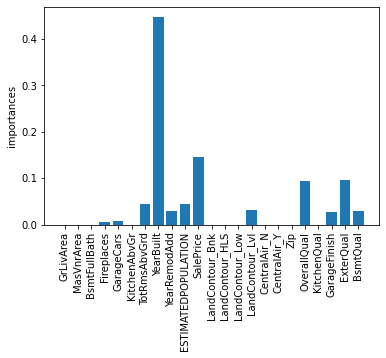

In [90]:
#Lets plot the predictors and their importance
importances = pd.Series(features_importances)
features = pd.Series(x_train.columns)
#Create plot 
plt.bar(features, importances)
plt.ylabel('importances')
plt.xticks(rotation='vertical')
plt.show()

In [91]:
#Lets create a decision tree object, which we will train only using the variables that have an importance value
dt_overallqual_vars = DecisionTreeClassifier(random_state = 1)

In [92]:
dt_overallqual_vars.fit(x_train[['Fireplaces', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'ESTIMATEDPOPULATION', 'SalePrice', 'LandContour_Lvl', 'OverallQual', 'GarageFinish',
       'ExterQual', 'BsmtQual']], y_train)
#Lets get the classification predictions  
dt_predictions = dt_overallqual_vars.predict(x_test[['Fireplaces', 'GarageCars', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'ESTIMATEDPOPULATION', 'SalePrice', 'LandContour_Lvl', 'OverallQual', 'GarageFinish',
       'ExterQual', 'BsmtQual']])

In [93]:
#Create the confusion matrix and classification report objects 
cm_overallqual_dt_vars = confusion_matrix(y_true = y_test, y_pred = dt_predictions)
cr_overallqual_dt_vars = classification_report(y_true = y_test, y_pred = dt_predictions)
print(cr_overallqual_dt_vars)

              precision    recall  f1-score   support

           1       0.38      0.23      0.29        13
           2       0.92      0.94      0.93       192
           3       0.30      0.33      0.32         9

    accuracy                           0.87       214
   macro avg       0.53      0.50      0.51       214
weighted avg       0.86      0.87      0.87       214



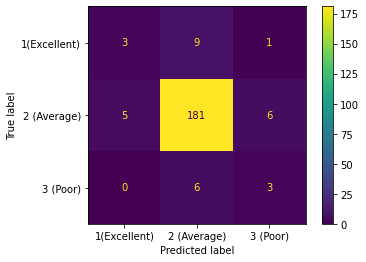

In [94]:
display_cm_overallqual_dt_vars = ConfusionMatrixDisplay(confusion_matrix = cm_overallqual_dt_vars, display_labels
                                                   = ['1(Excellent)', '2 (Average)', '3 (Poor)'])
display_cm_overallqual_dt_vars.plot()

### Answer 3

KNN classification model yielded an accuracy of 0.90, but it could not classify any observation for class 3. <br>

NB model did classify observations for class 3, however the precision for class 3 was 0.09. <br>

The Decision Tree model with default parameters yielded an accuracy of 0.86, however its precision for class 3 was 0.27 <br>

After tuning the parameters, we found the best parameters are: 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'. However, the accuracy of a model that uses these parameters is 0.87, however it fails to classify class 3, precision is 0.<br>

We decided to train a model only with the variables that have an importance and with the default parameters. This model yielded the a high accuracy: 0.87. This model could also classify observations that correspond to class 3. Class 3 precision is 30%, and class 1 precision is 27%. Therefore, we choose this model as the best predictor for classification. 

It is important to note that the model is very biased to class 2. Class 2 corresponds to Average quality, around 600 observations are classified as Average (more than 50% of the total observations of the dataset). We conclude that to improve the accuracy of this classification model, we need more observations. Specially, the observed classifications for the houses should have a normal distribution. It is important to avoid having skewed data, because the tail region may contain many outliers. Since outliers affect the mean of the dataset, this could lead to affect the performance of statistical models (Sharma, R., 2020). 

https://towardsdatascience.com/skewed-data-a-problem-to-your-statistical-model-9a6b5bb74e37


## Q4) In Ames, there are three main zip code areas. Are there any striking differences in the houses' attributes that allow classifying which zip code a property belongs to?. This will help real estate agents to decide if they should focus on sale of houses in a perticluar zip code. This is a classification problem

In [95]:
#To perform classification with our independent variable being Zip. 

x = quantetative_nominal_ordinal.drop(["Zip", "new"], axis=1)
# dropping the zip and new column from the dataframe. all other predictors in the resulting dataframe will be the independent variables



y = quantetative_nominal_ordinal["Zip"]
# storing the valeus under the Zip column as our dependent variable y



In [96]:
#Splitting the x and y dataframes into x and y test and train dataset in a 80:20 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Split x and y into train andtest set

**1. Training and testing Naive-Bayes classification for Zip Codes**

In [97]:
#Create and fit the model 
zip_nb = GaussianNB() 
zip_nb.fit(x_train, y_train)


GaussianNB()

              precision    recall  f1-score   support

       50010       1.00      1.00      1.00       138
       50014       1.00      1.00      1.00        64
       50105       1.00      1.00      1.00        12

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214

Confusion Matrix for Naive Bayes Model 

Accuracy of NB Model: 1.0
Precision of NB Model [50010, 50014,50105]: [1. 1. 1.]


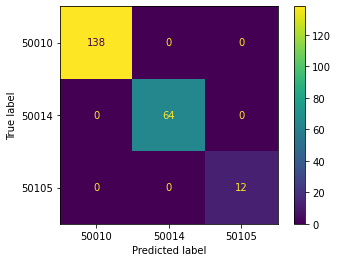

In [98]:
#Test the model
nb_predictions = zip_nb.predict(x_test)
#confusion matrix comparing our y_test and y_predicted values
cm_zip_NB = confusion_matrix(y_true = y_test, y_pred = nb_predictions)
cr_zip_NB = classification_report(y_true = y_test, y_pred = nb_predictions)
print(cr_zip_NB)

#Displaying the confusion Matrix for the Naive Bayes Model
print("Confusion Matrix for Naive Bayes Model \n")
display_cm_zip_NB = ConfusionMatrixDisplay(confusion_matrix = cm_zip_NB, display_labels
                                                   = ['50010', '50014','50105'])

print("Accuracy of NB Model:",metrics.accuracy_score(y_true = y_test, y_pred = nb_predictions))
print("Precision of NB Model [50010, 50014,50105]:",metrics.precision_score(y_true = y_test, y_pred = nb_predictions, average = None))

display_cm_zip_NB.plot()


Our Naive Bayes model improves precision and accuracy to 100%. We have a perfect model for this pair of testing and training data set. the reason for this is again because of our low number of total observations on which the model is made. our model is overfitted for this testing and training data set.

There is also a possibility that there are variables which have a 100% correlation between them and the independent variable thus overpowering the analysis. let us explore this classification further using decision trees.


**2. Trying decision tree classification for our model**


In [99]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree

In [100]:
#Creating Decision tree classifier object
decision_tree_zipcode = DecisionTreeClassifier()

#Creating labels which the model is supposed to classify
labels=['50010','50014','50105']

#fitting x_train and y_train into the classifier object
decision_tree_zipcode.fit(x_train, y_train)

DecisionTreeClassifier()

**How well did our tree perform?**


In [101]:
#Checking Accuracy of our report
print(classification_report(y_test, decision_tree_zipcode.predict(x_test)))

              precision    recall  f1-score   support

       50010       1.00      1.00      1.00       138
       50014       1.00      1.00      1.00        64
       50105       1.00      1.00      1.00        12

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



The tree has 100 percent! accuracy and precison classifying data into the three zip codes. which means that the tree has no problem identifying the three classes. lets take a look at the feature importance to see if there are suspicious co-relations between the predictor and the target variable

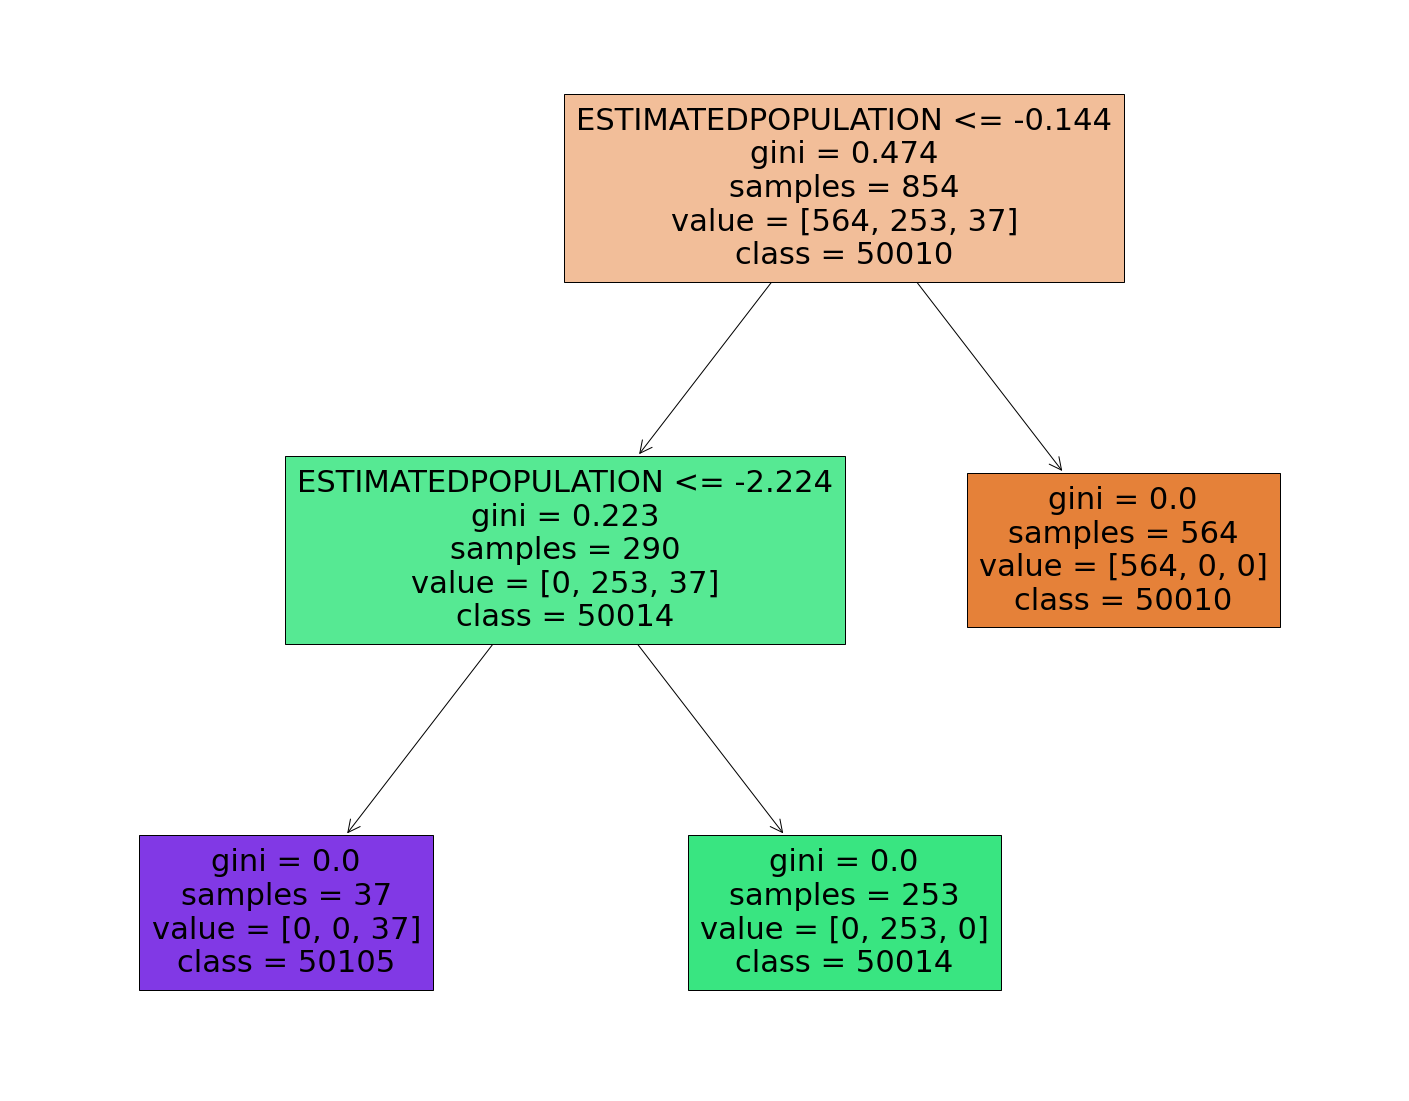

In [102]:
#plotting the decision treesplit on estimated population, with  depth of two
fig = plt.figure(figsize=(25,20))
plot_tree = tree.plot_tree(decision_tree_zipcode, 
                           feature_names=x_train.columns,
                           class_names=labels,
                           filled=True)

Out of the three classification models we have tried for this problem. both the naive bayes and Decision tree yeild 100 % accuracy and precision.

the way this can be interpretted is that the houses in the three different zip codes have a very specific relationship that shows suspicious level of correlation with one of the variable which needs to be identified and dropped.

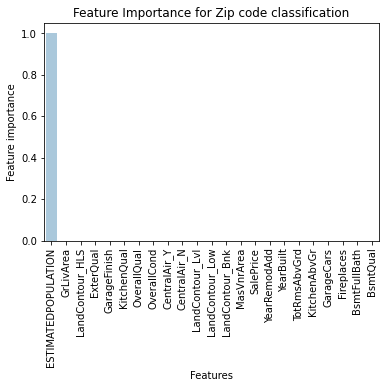

In [103]:
feature_importances = pd.DataFrame({ 'features': x_train.columns, 'importances': decision_tree_zipcode.feature_importances_ })
sns.barplot(x="features",y="importances" ,data=feature_importances, 
            order=feature_importances.sort_values('importances',ascending = False).features, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Feature Importance for Zip code classification")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

We have found out that there is a 100% corelation between estimated population and the zip code. to further filter down our analysis to find important features we will be dropping the estimated population parameter

In [104]:
x_train=x_train.drop(["ESTIMATEDPOPULATION"], axis=1)
x_test=x_test.drop(["ESTIMATEDPOPULATION"], axis=1)



In [105]:
#fitting x_train and y_train into the classifier object
decision_tree_zipcode.fit(x_train, y_train)

#Checking Accuracy of our report
print(classification_report(y_test, decision_tree_zipcode.predict(x_test)))

              precision    recall  f1-score   support

       50010       0.81      0.79      0.80       138
       50014       0.53      0.52      0.52        64
       50105       0.41      0.58      0.48        12

    accuracy                           0.70       214
   macro avg       0.58      0.63      0.60       214
weighted avg       0.70      0.70      0.70       214



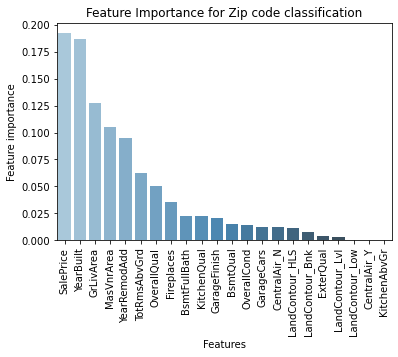

In [106]:
feature_importances = pd.DataFrame({ 'features': x_train.columns, 'importances': decision_tree_zipcode.feature_importances_ })
sns.barplot(x="features",y="importances" ,data=feature_importances, 
            order=feature_importances.sort_values('importances',ascending = False).features, palette="Blues_d")
plt.xticks(rotation=90)
plt.title("Feature Importance for Zip code classification")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

In [107]:
for i in range(1,20,2):
    print("for depth "+str(i))
    decision_tree_zipcode = DecisionTreeClassifier(max_depth=i)
    decision_tree_zipcode.fit(x_train, y_train)
    #Checking Accuracy of our report
    print(classification_report(y_test, decision_tree_zipcode.predict(x_test)))

for depth 1
              precision    recall  f1-score   support

       50010       0.64      1.00      0.78       138
       50014       0.00      0.00      0.00        64
       50105       0.00      0.00      0.00        12

    accuracy                           0.64       214
   macro avg       0.21      0.33      0.26       214
weighted avg       0.42      0.64      0.51       214

for depth 3
              precision    recall  f1-score   support

       50010       0.70      0.85      0.76       138
       50014       0.46      0.33      0.38        64
       50105       0.00      0.00      0.00        12

    accuracy                           0.64       214
   macro avg       0.38      0.39      0.38       214
weighted avg       0.59      0.64      0.61       214

for depth 5
              precision    recall  f1-score   support

       50010       0.77      0.81      0.79       138
       50014       0.55      0.44      0.49        64
       50105       0.35      0.50      

**Conducting Hyperparameter tuning to check overfitting by changing max_depth and max number of predictors**

We find that for max_depth = 8 we get a higher accuracy (72%) lets move on forward to hyperparameter tuning to find best number of parameters


In [108]:
accuracy_pred=list()
for i in range(1,21,1):
    print("for depth"+str(i))
    # Putting max_depth = 8 as per our findings from the previous cell
    decision_tree_zipcode = DecisionTreeClassifier(max_depth=8,max_features=i)
    decision_tree_zipcode.fit(x_train, y_train)
    #Checking Accuracy of our report
    print(classification_report(y_test, decision_tree_zipcode.predict(x_test)))
    accuracy_pred.append(accuracy_score(y_test, decision_tree_zipcode.predict(x_test)))

for depth1
              precision    recall  f1-score   support

       50010       0.65      0.99      0.79       138
       50014       0.40      0.03      0.06        64
       50105       1.00      0.08      0.15        12

    accuracy                           0.65       214
   macro avg       0.68      0.37      0.33       214
weighted avg       0.60      0.65      0.53       214

for depth2
              precision    recall  f1-score   support

       50010       0.70      0.90      0.78       138
       50014       0.57      0.25      0.35        64
       50105       0.25      0.17      0.20        12

    accuracy                           0.66       214
   macro avg       0.51      0.44      0.44       214
weighted avg       0.63      0.66      0.62       214

for depth3
              precision    recall  f1-score   support

       50010       0.78      0.85      0.81       138
       50014       0.55      0.44      0.49        64
       50105       0.46      0.50      0.4

In [109]:
#Finindg out the maximum number of predictors which would yeild maximum accuracy for decision trees
accuracy_pred.index(max(accuracy_pred))+1

19

we find out that our model yields a 72 % acccuracy with 4 parameters. which is still the highest

In [110]:
# Putting max_depth = 8 as per our findings from the previous cell
decision_tree_zipcode = DecisionTreeClassifier(max_depth=8,max_features=4)
decision_tree_zipcode.fit(x_train, y_train)
#Checking Accuracy of our report
print(classification_report(y_test, decision_tree_zipcode.predict(x_test)))

              precision    recall  f1-score   support

       50010       0.74      0.84      0.79       138
       50014       0.49      0.38      0.42        64
       50105       0.22      0.17      0.19        12

    accuracy                           0.66       214
   macro avg       0.49      0.46      0.47       214
weighted avg       0.64      0.66      0.65       214



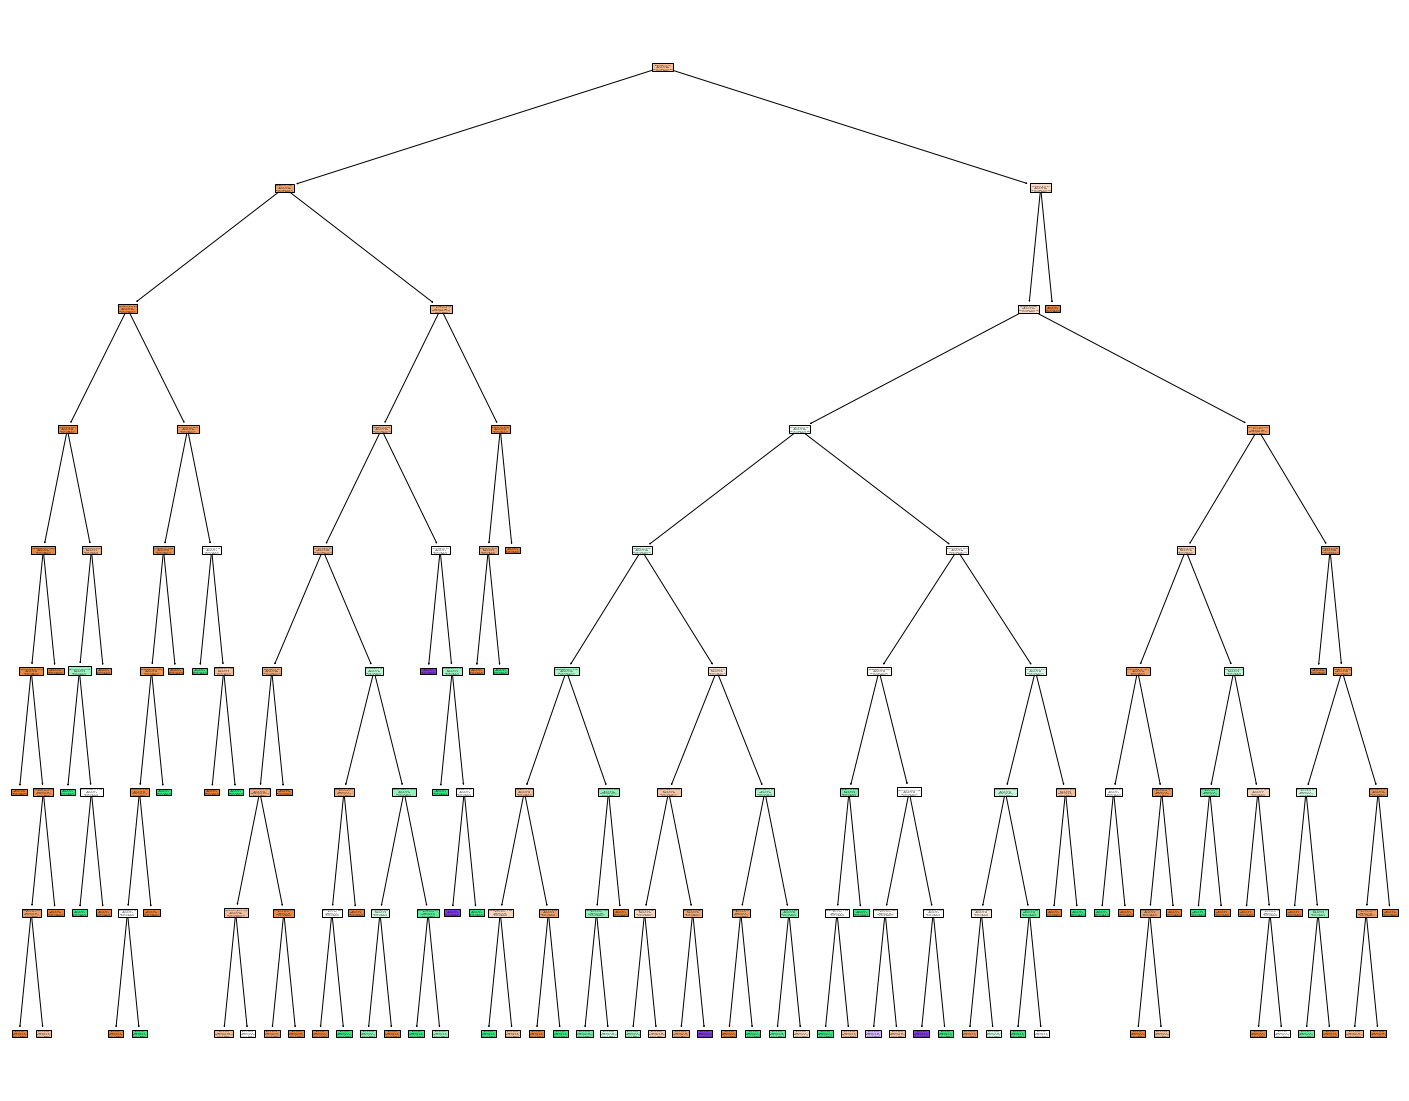

In [111]:
fig = plt.figure(figsize=(25,20))
plot_tree = tree.plot_tree(decision_tree_zipcode, 
                           feature_names=x_train.columns,
                           class_names=labels,
                           filled=True)

 we find out that our model yields a 72 % acccuracy with 4 parameters. which is still the highest

**3. Performing KNN on x_train and y_train to find the best value of nearest number of neighbors for our model**

In [112]:
#Splitting the x and y dataframes into x and y test and train dataset in a 80:20 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)#Split x and y into train andtest set
x_train=x_train.drop(["ESTIMATEDPOPULATION"], axis=1)
x_test=x_test.drop(["ESTIMATEDPOPULATION"], axis=1)

In [113]:
accuracy_KNN = []
list_neighbors = list(range(1,32))
for i in list_neighbors: 
    # setting nearest neighbours n_neighbours from 1 to 32 <32 
    #because we have 1068 observations we pick the squareroot of the n>
    
    #n_neighboors is feeded with the value of i which is iteratted from 1 to 32 to make a new knn_zip model for each iteration
    knn_zip = KNeighborsClassifier(n_neighbors = i)
    
    #To store the cross validation scores with 10 fold cross validation
    scores = cross_val_score(estimator = knn_zip, X = x_train, y = y_train, scoring = None, cv = 10) 
    #Since we set scoring = None, it will automatically calculate accuracy, as we handling a KNN model 
    
    print("Iteration " + str(i), "K =", i)
    print(scores)
    
    #we will be storing the mean of cv scores for KNN for n_neighbours 1:32 in accuracy_KNN
    print("Average accuracy (CV error) obtained from the 10 folds:", np.mean(scores))
    print("\n")
    accuracy_KNN.append(np.mean(scores))

Iteration 1 K = 1
[0.65116279 0.6744186  0.61627907 0.59302326 0.68235294 0.71764706
 0.69411765 0.67058824 0.69411765 0.74117647]
Average accuracy (CV error) obtained from the 10 folds: 0.6734883720930233


Iteration 2 K = 2
[0.68604651 0.6627907  0.63953488 0.65116279 0.72941176 0.72941176
 0.70588235 0.69411765 0.69411765 0.68235294]
Average accuracy (CV error) obtained from the 10 folds: 0.6874829001367989


Iteration 3 K = 3
[0.61627907 0.69767442 0.60465116 0.65116279 0.71764706 0.68235294
 0.71764706 0.71764706 0.65882353 0.67058824]
Average accuracy (CV error) obtained from the 10 folds: 0.6734473324213407


Iteration 4 K = 4
[0.61627907 0.70930233 0.6744186  0.68604651 0.72941176 0.68235294
 0.74117647 0.70588235 0.70588235 0.69411765]
Average accuracy (CV error) obtained from the 10 folds: 0.6944870041039672


Iteration 5 K = 5
[0.65116279 0.76744186 0.6744186  0.6744186  0.71764706 0.72941176
 0.75294118 0.72941176 0.69411765 0.68235294]
Average accuracy (CV error) obtained 

In [114]:
ymaxvalue = max(accuracy_KNN)
#storing maximimum values of accuracy for all KNNs

list_neighbors

#Finding out the position index of accuracy_KNN which holds maximum accuracy
maxvalue_position = accuracy_KNN.index(max(accuracy_KNN)) 

#Finding the value of the best value of n_nearest neighbours to be used for our model
bestK = list_neighbors[int(maxvalue_position)]



KNN_accuracy  = ymaxvalue

**Plotting Accuracy rate vs N_numbers curve to find the nearest numbers of neighbours that will yeild maximum accuracy for our model¶**

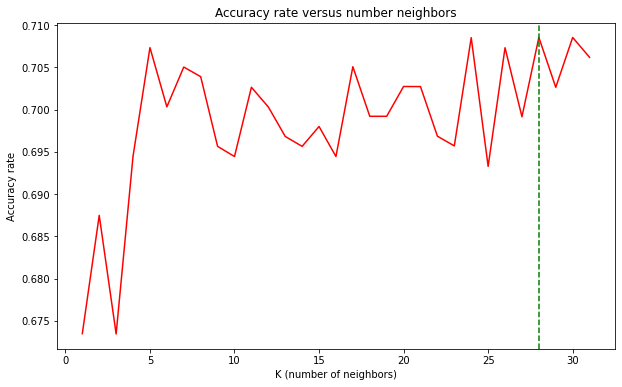


Best K for KNN Model: 28 
KNN's Accuracy: 0.7085362517099864


In [115]:
plt.figure(figsize = (10,6))
plt.plot(list_neighbors, accuracy_KNN, color = "red")
plt.title("Accuracy rate versus number neighbors")
plt.xlabel('K (number of neighbors)')
plt.ylabel('Accuracy rate')
plt.axvline(x = bestK, color='green', linestyle='dashed')
plt.show()

print("\nBest K for KNN Model: " + str(bestK), "\nKNN's Accuracy:", KNN_accuracy)

From the plot above we can clearly notice that the KNN provides the highst accuracy when the nearest neighbours used for the classification is equal to 28.
We will be classifying and fitting knn with the x_train and y_train.¶

In [116]:
knn_zip = KNeighborsClassifier(n_neighbors = 28)
#Here the value of bestK = 28

knn_zip.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=28)

In [117]:
knn_predictions = knn_zip.predict(x_test) 
#W get an array of the y_predictions for the zipcodes (50010,50014,50105)

**Generating a confusion Matrix for the KNN Model**

              precision    recall  f1-score   support

       50010       0.73      0.89      0.80       138
       50014       0.60      0.39      0.47        64
       50105       1.00      0.25      0.40        12

    accuracy                           0.71       214
   macro avg       0.77      0.51      0.56       214
weighted avg       0.70      0.71      0.68       214

Confusion Matrix for KNN Model (K = 28) 



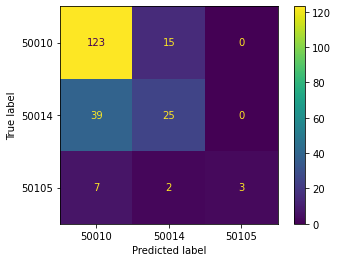

In [118]:
cm_zip_KNN = confusion_matrix(y_true = y_test, y_pred = knn_predictions)
cr_zip_KNN = classification_report(y_true = y_test, y_pred = knn_predictions)
print(cr_zip_KNN)

print("Confusion Matrix for KNN Model (K = 28) \n")
display_cm_zip_KNN = ConfusionMatrixDisplay(confusion_matrix = cm_zip_KNN, display_labels
                                                   = ['50010', '50014','50105'])
display_cm_zip_KNN.plot()

In [119]:
print("Accuracy of KNN Model:",metrics.accuracy_score(y_true = y_test, y_pred = knn_predictions))
print("Precision of KNN Model [50010,50014,50105]:",metrics.precision_score(y_true = y_test, y_pred = knn_predictions, average = None))


Accuracy of KNN Model: 0.705607476635514
Precision of KNN Model [50010,50014,50105]: [0.72781065 0.5952381  1.        ]


The model has a decent precssion for predicting the zip codes of 50010, 50105. The model predicts the houses with zip code of 50010 and 50105 have  with an accuracy of 75%
it predicts the houses with zip code 50014 with an accuracy of 59.25%




**4. Trying Naive Bayes classification once agian with one column dropped**

In [120]:
zip_nb = GaussianNB() 
zip_nb.fit(x_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

       50010       0.90      0.33      0.48       138
       50014       0.46      0.09      0.16        64
       50105       0.08      1.00      0.15        12

    accuracy                           0.29       214
   macro avg       0.48      0.47      0.26       214
weighted avg       0.72      0.29      0.36       214

Confusion Matrix for Naive Bayes Model 

Accuracy of NB Model: 0.29439252336448596
Precision of NB Model [50010, 50014,50105]: [0.9        0.46153846 0.0794702 ]


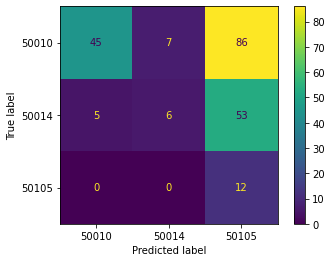

In [121]:
#Test the model
nb_predictions = zip_nb.predict(x_test)
#confusion matrix comparing our y_test and y_predicted values
cm_zip_NB = confusion_matrix(y_true = y_test, y_pred = nb_predictions)
cr_zip_NB = classification_report(y_true = y_test, y_pred = nb_predictions)
print(cr_zip_NB)

#Displaying the confusion Matrix for the Naive Bayes Model
print("Confusion Matrix for Naive Bayes Model \n")
display_cm_zip_NB = ConfusionMatrixDisplay(confusion_matrix = cm_zip_NB, display_labels
                                                   = ['50010', '50014','50105'])

print("Accuracy of NB Model:",metrics.accuracy_score(y_true = y_test, y_pred = nb_predictions))
print("Precision of NB Model [50010, 50014,50105]:",metrics.precision_score(y_true = y_test, y_pred = nb_predictions, average = None))

display_cm_zip_NB.plot()


## Answer 4:
    
-> The Decision tree model is able to present an accuracy of 72% with a maximum depth = 8. whwenever the node makes a decision it doespredicts the best accuracy with 4 predictors.

"SalePrice", "YearBuilt","GrLivArea","YearRemodAdd".

-> The KNN model is able predict an accuracy of 71.67% as well with KNN Nearest neighbours=31

-> Th NB model does a pooere job with accuracy with only 39% accuracy

-> We rely on the decision trees model for classification.

-> Our decision trees model is able to It is able to precisely identify 50010 (class 1) zip codes with 79%,(class 2) 50014 with 58% precision and (class 3) 50105 with 55% precison. 








## SECTION 3: Conclusions 

Our excercise of identifying key variables that have an impact on the sale price is complete.

We have identified that following are key variables which are significant by each category type:

A) Quantetative Variables:

    1) GrLivArea
    
    2) MasVnrArea	
    
    3) BsmtFullBath	
    
    4)Fireplaces
    
    5)GarageCars
    
    6)KitchenAbvGr
    
    7)TotRmsAbvGrd
    
    8)YearBuilt
    
    9)YearRemodAdd
    
    10) Estimate Population
    
    
 B) Ordinal Variables:

    1) OverallQual
    
    2) KitchenQual
    
    3) GarageFinish
    
    4) ExterQual
    
    5) BsmtQual
    
C) Nominal Variables:

    1) LandContour_Bnk
    
    2) LandContour_HLS
    
    3) LandContour_Low
    
    4) LandContour_Lvl
    
    5) CentralAir_N
    
    6) CentralAir_Y


From our results above we see that there is not substantial difference between the R square and MSE between the three models. Based on pure measurement we can see that the Ridge regression method is best at making the best predictions with the least MSE score of 0.1283466 and also has the highest R square value of 0.8682587

It is important to note that the model is very biased to class 2. Class 2 corresponds to Average quality, around 600 observations are classified as Average (more than 50% of the total observations of the dataset). We conclude that to improve the accuracy of this classification model, we need more observations. Specially, the observed classifications for the houses should have a normal distribution. It is important to avoid having skewed data, because the tail region may contain many outliers. Since outliers affect the mean of the dataset, this could lead to affect the performance of statistical models (Sharma, R., 2020).


The Decision tree model is able to present an accuracy of 72% with a maximum depth = 8. whwenever the node makes a decision it doespredicts the best accuracy with 4 predictors.

"SalePrice", "YearBuilt","GrLivArea","YearRemodAdd".


Our decision trees model is able to It is able to precisely identify 50010 (class 1) zip codes with 79%,(class 2) 50014 with 58% precision and (class 3) 50105 with 55% precison.


# SECTION 4: Future Work

The dataset has a large number of variables, therefore, it is challenging to choose the right number of predictors. Furthermore, when cleaning the dataset we encounter many columns with missing values. According to (Rençberoğlu, E., 2020), some strategies we could explore for preparing out dataset are: 
1. Replace missing values with the median value of a column, if we are dealing with continuous variables. Replace missing values with the mode, if we are dealing with categorical variables. However, we think that when using this approach, it is very important to know the distribution of our column's data. In this, we could use the Rank2D function of yellowbrick that assess the normality of the distribution of instances with respect to the feature (Yellowbrick documentation). We think that if a column is normaly distributed, we could apply the mean/mode substitution. 

https://www.scikit-yb.org/en/latest/api/features/rankd.html
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

2. Exploring the distribution of feature's data, we could detect outliers. For instance, boxplots could be useful for detecting outliers in categorical variables. Then, we could deal with these outliers by dropping them. <br>


3. We could have further explored the covariance of variables, does the covariance indicates that one variable has a true relationship with another? I.e. are there variables that we could use to construct a new variable? https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/


4. According to (Rençberoğlu, E., 2020), log transformation is useful when dealing with skewed data. We observed that the frequency observations for each class of the Overall Condition variable were highly skewed. Probably, a log transformation could improve the accuracy of the predictions. However, the small number of observations affects the model performance. <br>


5. When assessing the relevante of categorical variables, we could have explored a one-way analysis of variance (ANOVA). This analysis is used when we have a categorical independent variable (with two or more categories) and a normally distributed interval dependent variable and you wish to test for differences in the means of the dependent variable broken down by the levels of the independent variable.
https://stats.idre.ucla.edu/stata/whatstat/what-statistical-analysis-should-i-usestatistical-analyses-using-stata/

## References

1) Coorelation Plots - https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas 

2) Droping Rows based on condition - https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/ 

3) Homework 1 Answers: https://canvas.cmu.edu/courses/24302/files/7198175?module_item_id=4968645&fd_cookie_set=1 

4) Homework 2 Answers: https://canvas.cmu.edu/courses/24302/files/7263075?module_item_id=4976097&fd_cookie_set=1 

5) Lab 1 Answers: https://canvas.cmu.edu/courses/24302/files/7141330?module_item_id=4962341&fd_cookie_set=1 

6) Lab 2 Answers: https://canvas.cmu.edu/courses/24302/files/7198170?module_item_id=4968644&fd_cookie_set=1 

7) Creating Data Frames: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ 

8) JOining Dataframes - https://datacarpentry.org/python-socialsci/11-joins/index.html

9) Lab 3: https://canvas.cmu.edu/courses/24302/files/7307264?module_item_id=4981711&fd_cookie_set=1

10) Get Column Name as List: https://datascienceparichay.com/article/get-column-names-as-list-in-pandas-dataframe/

11) Pandas NameError: name 'merge' is not defined: https://stackoverflow.com/questions/28933646/pandas-nameerror-name-merge-is-not-defined

12) How to join (merge) data frames: https://stackoverflow.com/questions/1299871/how-to-join-merge-data-frames-inner-outer-left-right

13) How can I concat multiple dataframes in Python : https://stackoverflow.com/questions/53877687/how-can-i-concat-multiple-dataframes-in-python

14) Best way to count the number of rows with missing values : https://stackoverflow.com/questions/28199524/best-way-to-count-the-number-of-rows-with-missing-values-in-a-pandas-dataframe

15) How to add column from another dataframe: https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/

16) Python round() Function: https://www.w3schools.com/python/ref_func_round.asp

17) House Prices : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt

18) Make the size of a heatmap bigger with seaborn: https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

19) Coorelation Plots - https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

20) Droping Rows based on condition - https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

21) Homework 1 Answers: https://canvas.cmu.edu/courses/24302/files/7198175?module_item_id=4968645&fd_cookie_set=1 

22) Homework 2 Answers: https://canvas.cmu.edu/courses/24302/files/7263075?module_item_id=4976097&fd_cookie_set=1 

23) Lab 1 Answers: https://canvas.cmu.edu/courses/24302/files/7141330?module_item_id=4962341&fd_cookie_set=1 

24) Lab 2 Answers: https://canvas.cmu.edu/courses/24302/files/7198170?module_item_id=4968644&fd_cookie_set=1 

25) Creating Data Frames: https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/ 

26) JOining Dataframes - https://datacarpentry.org/python-socialsci/11-joins/index.html

## THANK YOU